## Atrishi Jha - Cumulative Returns Financial Strategy

### Importing the Relevant Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import talib as tb
import yfinance as yf
import mplfinance as mpf
import pyfolio as pf


C:\Users\atris\AppData\Roaming\Python\Python311\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


## Loading the Dataset

I have used pandas_datareader as per the recommendation from the documentation of yfinance to speeden up the download of the dataset. I am analysing stocks starting from the beginning of 2017 to the beginning of 2022 (it also includes the pandemic years, where most tech companies saw a boom) for this project alongside Adani stocks from the beginning of 2021 (as a stock which underperformed).

In [2]:
from pandas_datareader import data as pdr
yf.pdr_override()
GOOGL = pdr.get_data_yahoo("GOOGL", start = "2017-01-01", end = "2022-01-01")
MSFT = pdr.get_data_yahoo("MSFT", start = "2017-01-01", end = "2022-01-01")
AAPL = pdr.get_data_yahoo("AAPL", start = "2017-01-01", end = "2022-01-01")
TSLA = pdr.get_data_yahoo("TSLA", start = "2017-01-01", end = "2022-01-01")
ADANI = pdr.get_data_yahoo("ADANIENT.NS", start = "2017-03-01", end = "2022-03-01")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Plotting the Stock Prices

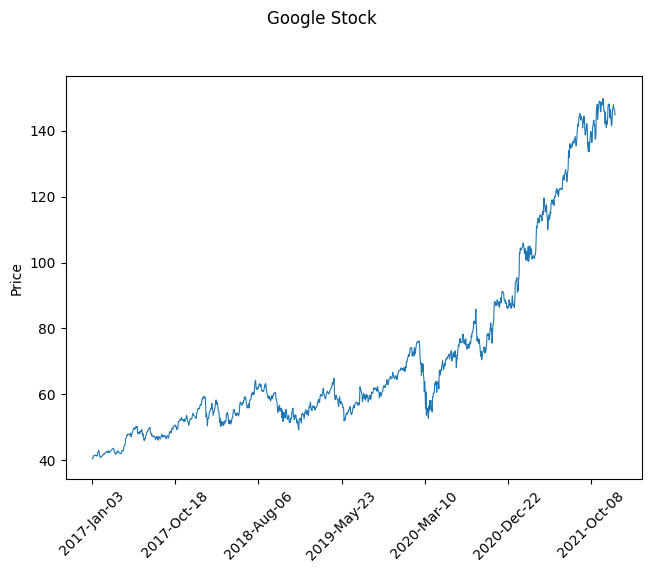

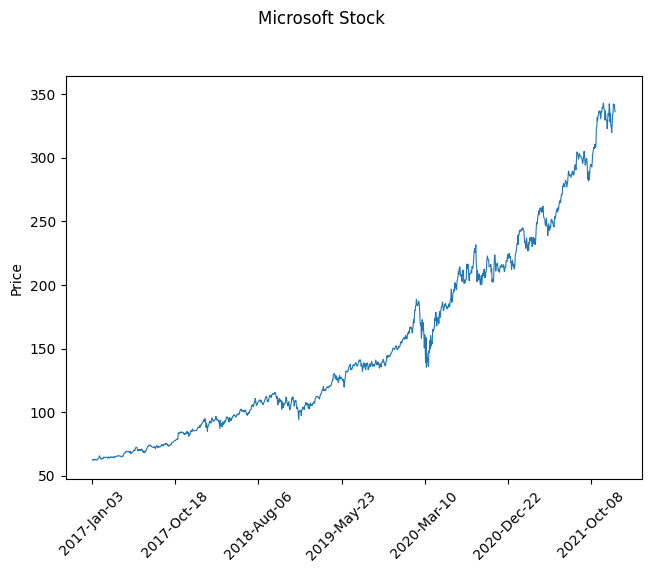

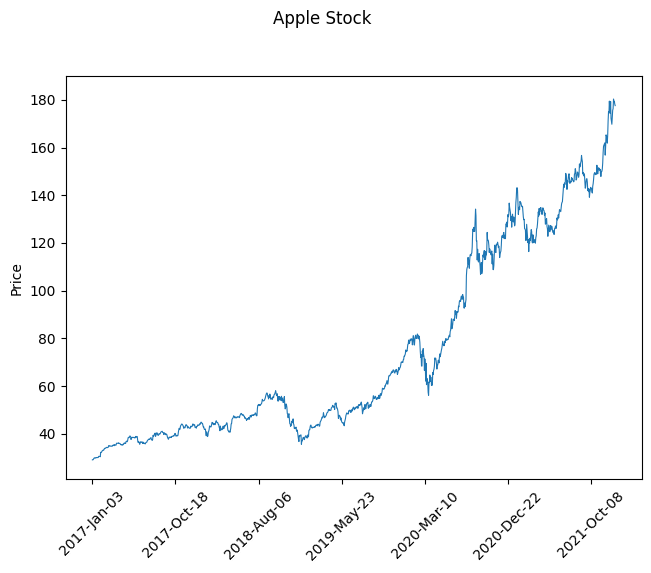

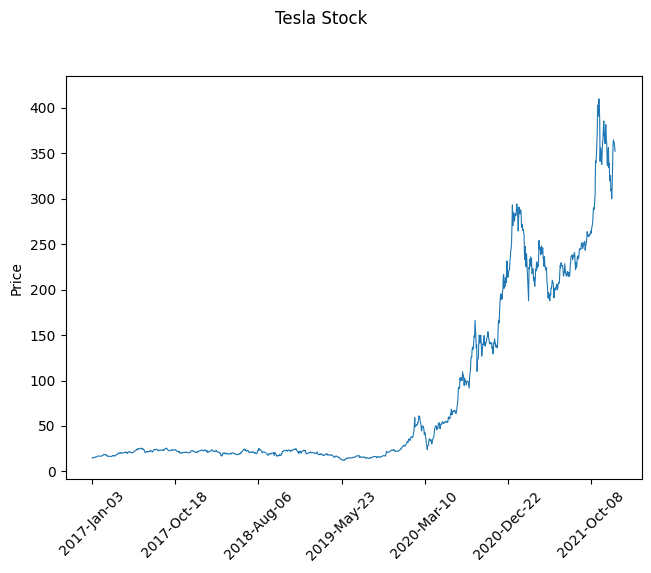

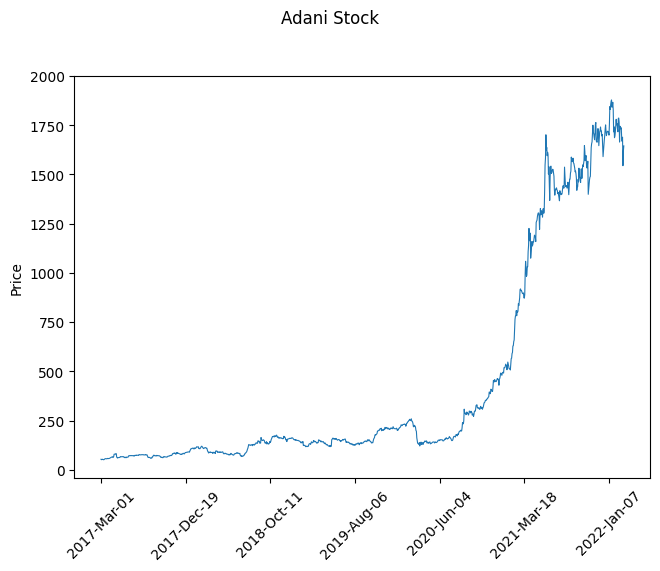

In [3]:
# Defining the market colors and styles for the mpf plots
market_colors = mpf.make_marketcolors(up='green', down='red', inherit=True)
mpf_style = mpf.make_mpf_style(marketcolors=market_colors)
# create the tick graph
mpf.plot(GOOGL, type = 'line', style=mpf_style, title="Google Stock")
mpf.plot(MSFT, type = 'line', style = mpf_style , title="Microsoft Stock")
mpf.plot(AAPL, type = 'line', style = mpf_style, title="Apple Stock")
mpf.plot(TSLA, type = 'line', style = mpf_style, title="Tesla Stock")
mpf.plot(ADANI, type = 'line', style = mpf_style, title="Adani Stock")

### Building EMA functions with the masking

In [4]:
short = 20
middle = 50
long = 300

def EMA_func (data, stock) :
    mask = data['Close'] > data['Open']
    
    SEMA = data[mask]['Close'].ewm(span=short, adjust=False).mean() 
    MEMA = data[mask]['Close'].ewm(span=middle, adjust=False).mean()
    LEMA = data[mask]['Close'].ewm(span=long, adjust=False).mean()
    # data['Short_EMA'] = SEMA
    # data['Middle_EMA'] = MEMA
    # data['Long_EMA'] = LEMA
    data['Short_EMA'] = np.nan  # Initialize with NaN
    data['Middle_EMA'] = np.nan  # Initialize with NaN
    data['Long_EMA'] = np.nan  # Initialize with NaN

    data.loc[mask, 'Short_EMA'] = SEMA
    data.loc[mask, 'Middle_EMA'] = MEMA
    data.loc[mask, 'Long_EMA'] = LEMA
    
    plt.figure(figsize=(16,8))
    plt.title(stock + ' EMA', fontsize = 20)
    plt.plot(data['Close'], label = 'Close Price')
    plt.plot(data['Short_EMA'], label='Fast EMA', color = 'red')
    plt.plot(data['Middle_EMA'], label='Medium EMA', color = 'orange')
    plt.plot(data['Long_EMA'], label='Slow EMA', color = 'green')
    plt.xlabel('Date',fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.legend(loc='best')
    plt.show()
    
    #short exponential movig average, middle exponential moving average and long exponential moving average for different stock datas are calculated through this function. This indicator helps to give an idea baout the bullish/ bearish nature of the market.


def DEMA_func (data, stock) :
    mask = data['Close'] > data['Open']
    
    SEMA = data[mask]['Close'].ewm(span=short, adjust=False).mean()
    MEMA = data[mask]['Close'].ewm(span=middle, adjust=False).mean()
    LEMA = data[mask]['Close'].ewm(span=long, adjust=False).mean()
    SEMA1 = SEMA.ewm(span=short, adjust=False).mean()
    MEMA1 = MEMA.ewm(span=middle, adjust=False).mean()
    LEMA1 = LEMA.ewm(span=long, adjust=False).mean()

    data['Short_DEMA'] = np.nan  # Initialize with NaN
    data['Middle_DEMA'] = np.nan  # Initialize with NaN
    data['Long_DEMA'] = np.nan  # Initialize with NaN

    data.loc[mask, 'Short_DEMA'] = 2 * SEMA - SEMA1
    data.loc[mask, 'Middle_DEMA'] = 2 * MEMA - MEMA1
    data.loc[mask, 'Long_DEMA'] = 2 * LEMA - LEMA1
    
    plt.figure(figsize=(16,8))
    plt.title(stock + ' DEMA', fontsize = 20)
    plt.plot(data['Close'], label = 'Close Price')
    plt.plot(data['Short_DEMA'], label='Fast DEMA', color = 'red')
    plt.plot(data['Middle_DEMA'], label='Medium DEMA', color = 'orange')
    plt.plot(data['Long_DEMA'], label='Slow DEMA', color = 'green')
    plt.xlabel('Date',fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.legend(loc='best')
    plt.show()
    
    #double exponential movinga average indicator over the three periods, to reduce noise and lag in financial markets. The aim is to smooth out price data. 

def TEMA_func (data, stock) :
    mask = data['Close'] > data['Open']
    
    SEMA = data[mask]['Close'].ewm(span=short, adjust=False).mean()
    MEMA = data[mask]['Close'].ewm(span=middle, adjust=False).mean()
    LEMA = data[mask]['Close'].ewm(span=long, adjust=False).mean()
    
    SEMA1 = SEMA.ewm(span=short, adjust=False).mean()
    MEMA1 = MEMA.ewm(span=middle, adjust=False).mean()
    LEMA1 = LEMA.ewm(span=long, adjust=False).mean()
    
    SEMA2 = SEMA1.ewm(span=short, adjust=False).mean()
    MEMA2 = MEMA1.ewm(span=middle, adjust=False).mean()
    LEMA2 = LEMA1.ewm(span=long, adjust=False).mean()
    
    data['Short_TEMA'] = 3*SEMA - 3*SEMA1 + SEMA2
    data['Middle_TEMA'] = 3*MEMA - 3*MEMA1 + MEMA2
    data['Long_TEMA'] = 3*LEMA - 3*LEMA1 + LEMA2
    
    plt.figure(figsize=(16,8))
    plt.title(stock + ' TEMA', fontsize = 20)
    plt.plot(data['Close'], label = 'Close Price')
    plt.plot(data['Short_TEMA'], label='Fast TEMA', color = 'red')
    plt.plot(data['Middle_TEMA'], label='Medium TEMA', color = 'orange')
    plt.plot(data['Long_TEMA'], label='Slow TEMA', color = 'green')
    plt.xlabel('Date',fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.legend(loc='best')
    plt.show()

    #indicator used- triple exponential moving average.

def QEMA_func (data, stock) :
    mask = data['Close'] > data['Open']
    
    SEMA = data[mask]['Close'].ewm(span=short, adjust=False).mean()
    MEMA = data[mask]['Close'].ewm(span=middle, adjust=False).mean()
    LEMA = data[mask]['Close'].ewm(span=long, adjust=False).mean()
    
    SEMA1 = SEMA.ewm(span=short, adjust=False).mean()
    MEMA1 = MEMA.ewm(span=middle, adjust=False).mean()
    LEMA1 = LEMA.ewm(span=long, adjust=False).mean()
    
    SEMA2 = SEMA1.ewm(span=short, adjust=False).mean()
    MEMA2 = MEMA1.ewm(span=middle, adjust=False).mean()
    LEMA2 = LEMA1.ewm(span=long, adjust=False).mean()
    
    SEMA3 = SEMA2.ewm(span=short, adjust=False).mean()
    MEMA3 = MEMA2.ewm(span=middle, adjust=False).mean()
    LEMA3 = LEMA2.ewm(span=long, adjust=False).mean()
    
    data['Short_QEMA'] = 4*SEMA - 6*SEMA1 + 4*SEMA2 - SEMA3
    data['Middle_QEMA'] = 4*MEMA - 6*MEMA1 + 4*MEMA2 - MEMA3
    data['Long_QEMA'] = 4*LEMA - 6*LEMA1 + 4*LEMA2 - LEMA3
    
    plt.figure(figsize=(16,8))
    plt.title(stock + ' QEMA', fontsize = 20)
    plt.plot(data['Close'], label = 'Close Price')
    plt.plot(data['Short_QEMA'], label='Fast QEMA', color = 'red')
    plt.plot(data['Middle_QEMA'], label='Medium QEMA', color = 'orange')
    plt.plot(data['Long_QEMA'], label='Slow QEMA', color = 'green')
    plt.xlabel('Date',fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.legend(loc='best')
    plt.show()
    
    #indicator- quadruple ema.

def PEMA_func (data, stock) :
    mask = data['Close'] > data['Open']
    
    SEMA = data[mask]['Close'].ewm(span=short, adjust=False).mean()
    MEMA = data[mask]['Close'].ewm(span=middle, adjust=False).mean()
    LEMA = data[mask]['Close'].ewm(span=long, adjust=False).mean()
    
    SEMA1 = SEMA.ewm(span=short, adjust=False).mean()
    MEMA1 = MEMA.ewm(span=middle, adjust=False).mean()
    LEMA1 = LEMA.ewm(span=long, adjust=False).mean()
    
    SEMA2 = SEMA1.ewm(span=short, adjust=False).mean()
    MEMA2 = MEMA1.ewm(span=middle, adjust=False).mean()
    LEMA2 = LEMA1.ewm(span=long, adjust=False).mean()
    
    SEMA3 = SEMA2.ewm(span=short, adjust=False).mean()
    MEMA3 = MEMA2.ewm(span=middle, adjust=False).mean()
    LEMA3 = LEMA2.ewm(span=long, adjust=False).mean()
    
    SEMA4 = SEMA3.ewm(span=short, adjust=False).mean()
    MEMA4 = MEMA3.ewm(span=middle, adjust=False).mean()
    LEMA4 = LEMA3.ewm(span=long, adjust=False).mean()
    
    data['Short_PEMA'] = 5*SEMA - 10*SEMA1 + 10*SEMA2 - 5*SEMA3 + SEMA4
    data['Middle_PEMA'] = 5*MEMA - 10*MEMA1 + 10*MEMA2 - 5*MEMA3 + MEMA4
    data['Long_PEMA'] = 5*LEMA - 10*LEMA1 + 10*LEMA2 - 5*LEMA3 + LEMA4
    
    plt.figure(figsize=(16,8))
    plt.title(stock + ' PEMA', fontsize = 20)
    plt.plot(data['Close'], label = 'Close Price')
    plt.plot(data['Short_PEMA'], label='Fast PEMA', color = 'red')
    plt.plot(data['Middle_PEMA'], label='Medium PEMA', color = 'orange')
    plt.plot(data['Long_PEMA'], label='Slow PEMA', color = 'green')
    plt.xlabel('Date',fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.legend(loc='best')
    plt.show()
    
    #indicator- pentagon ema

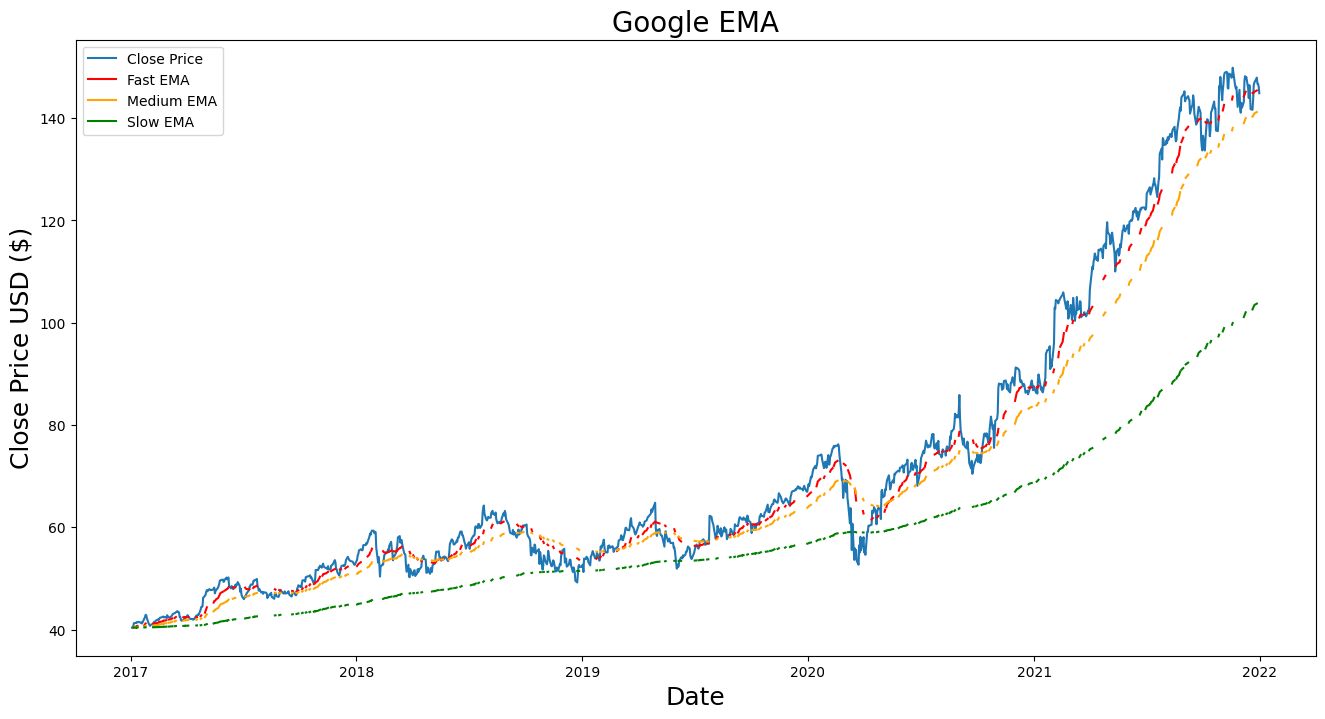

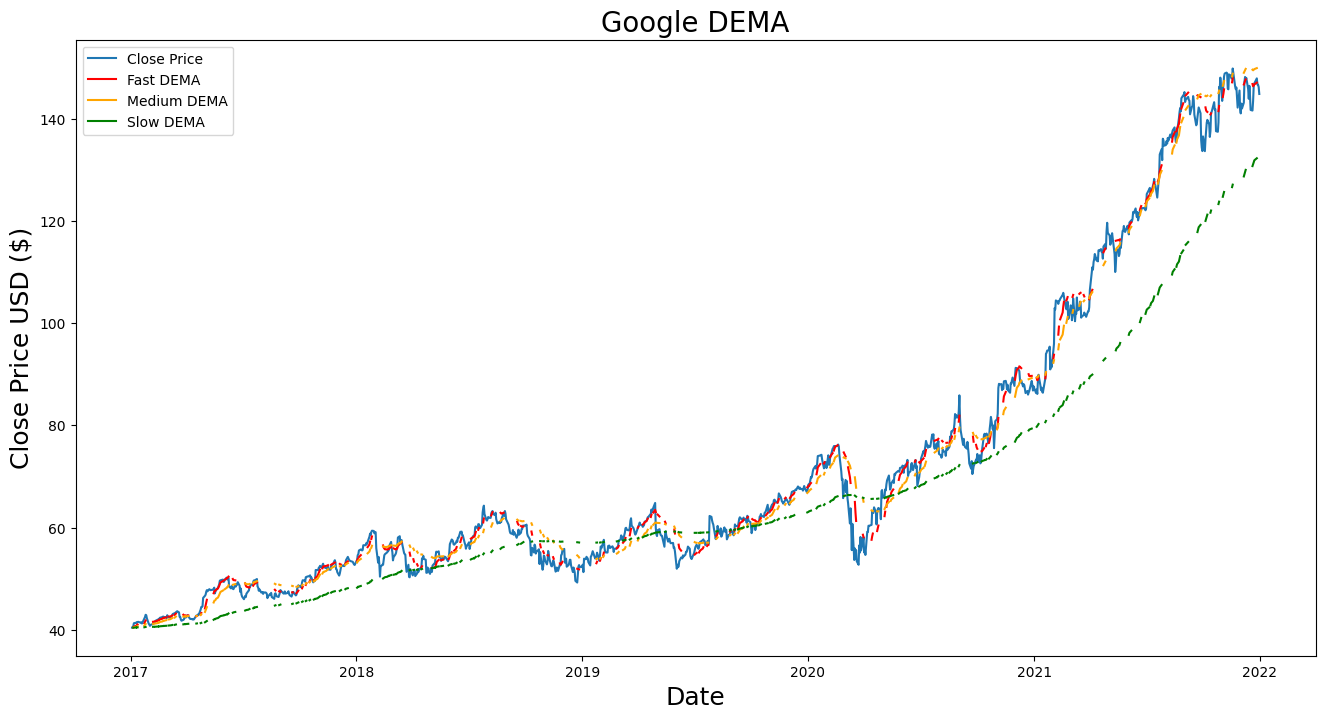

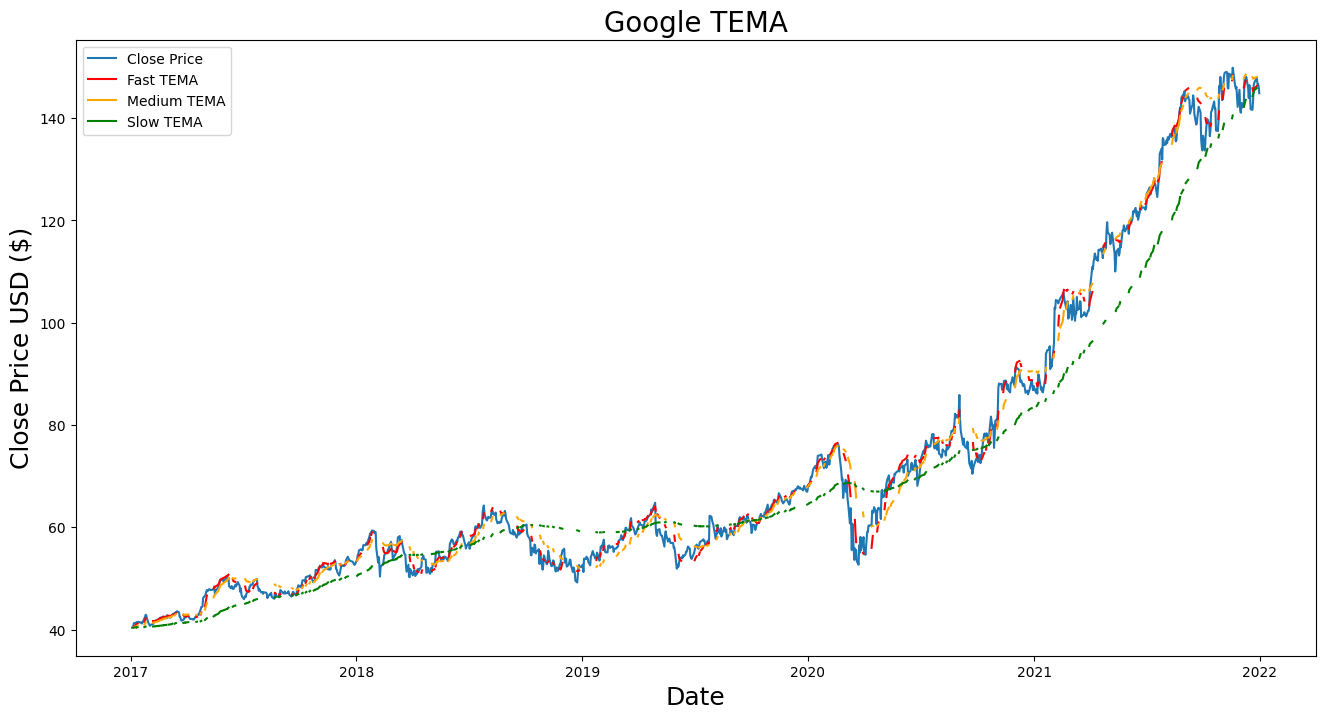

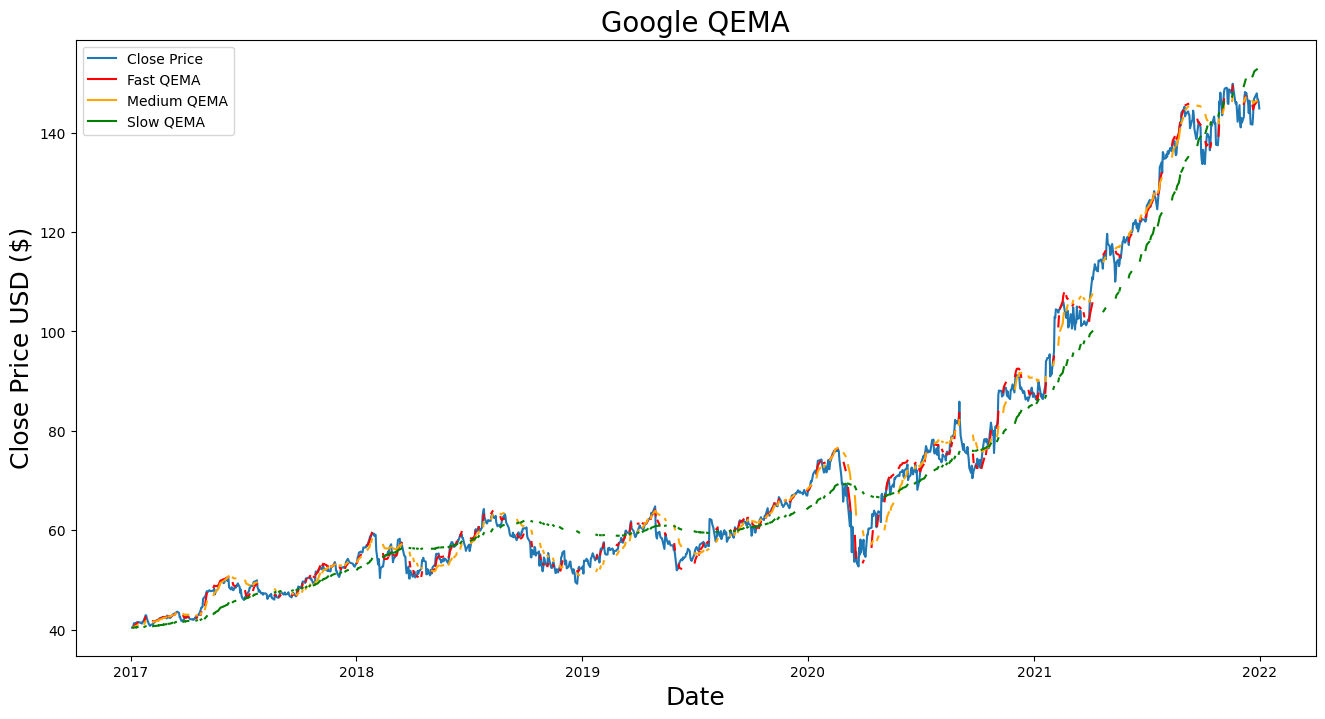

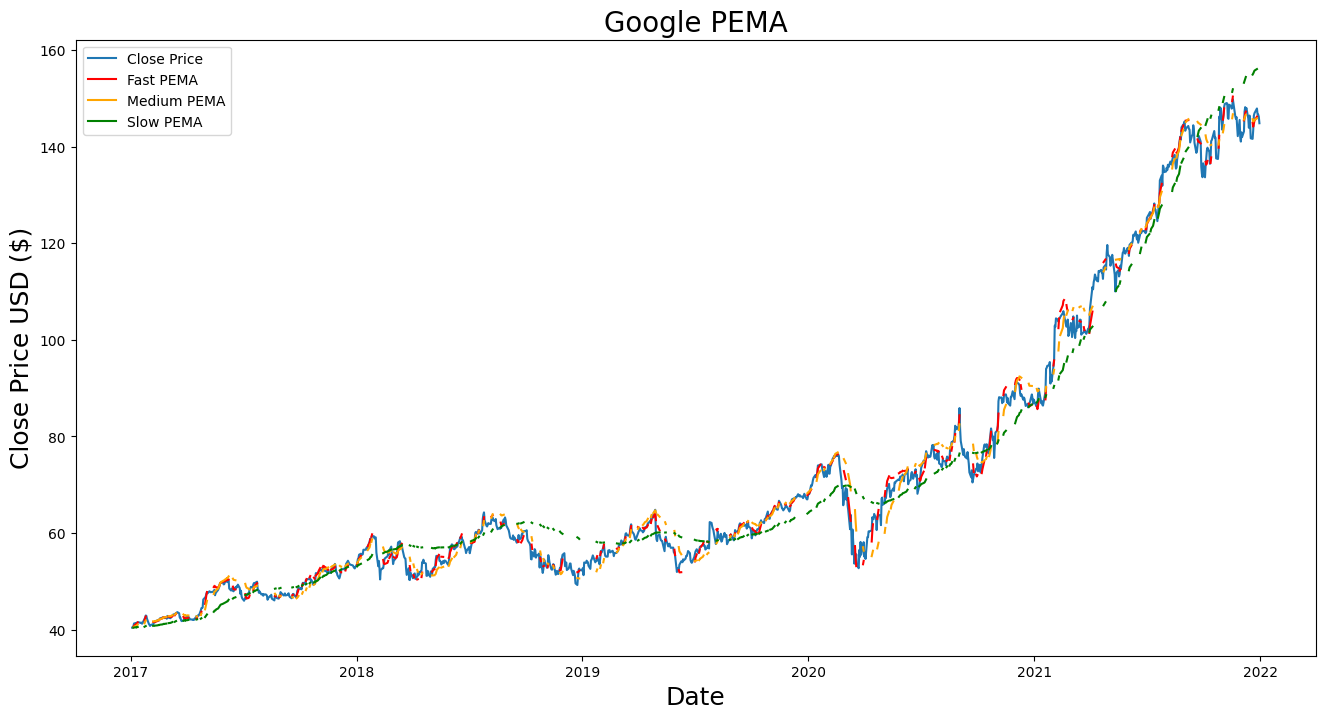

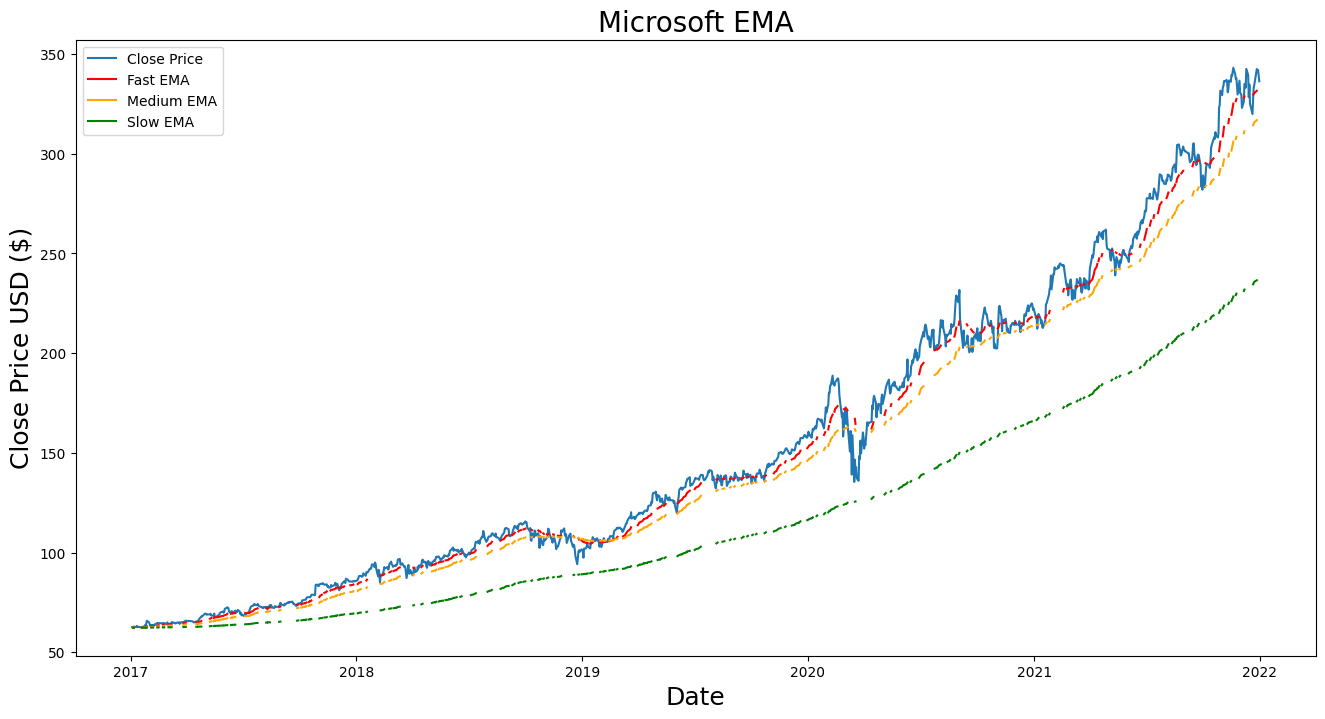

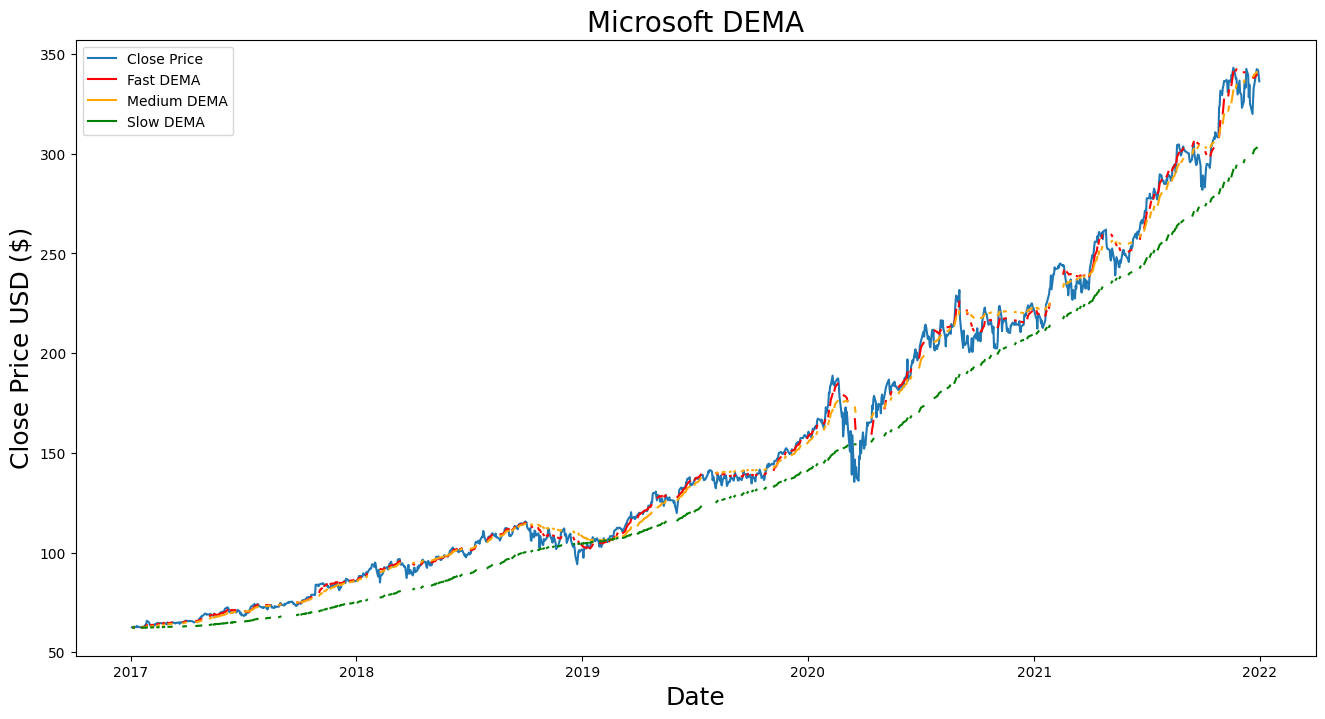

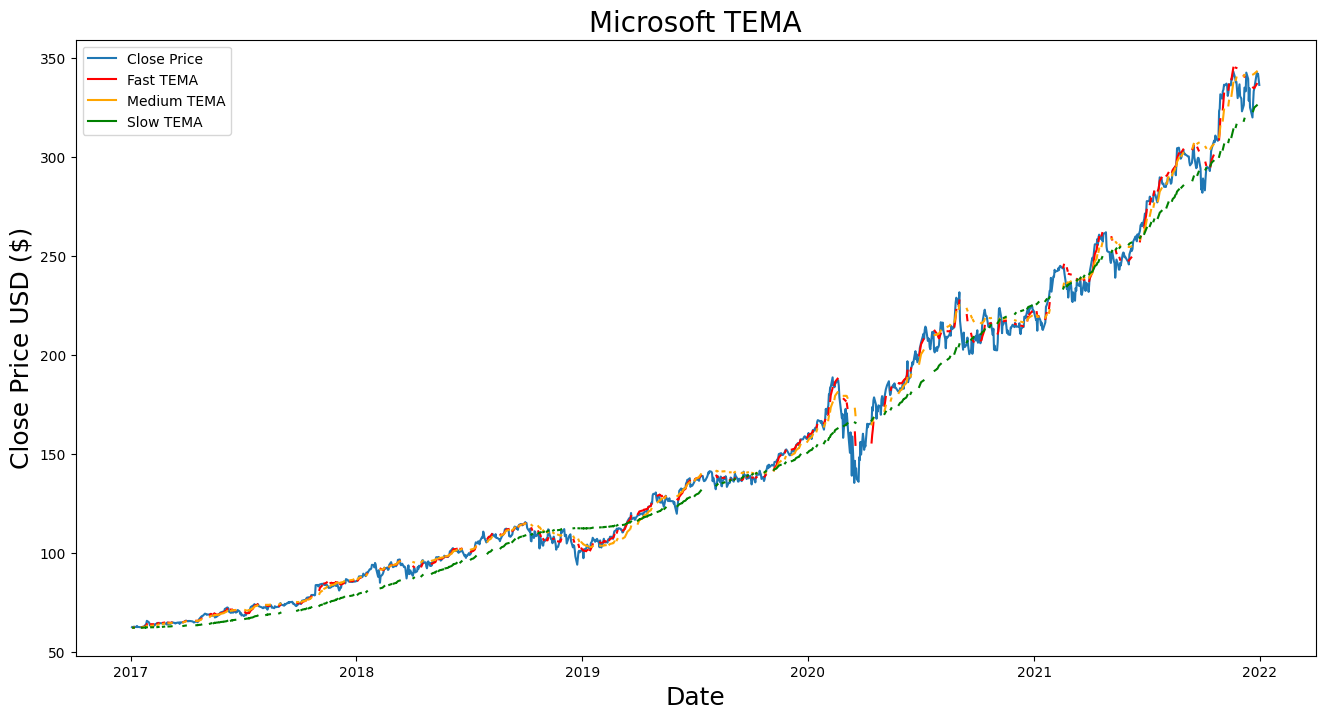

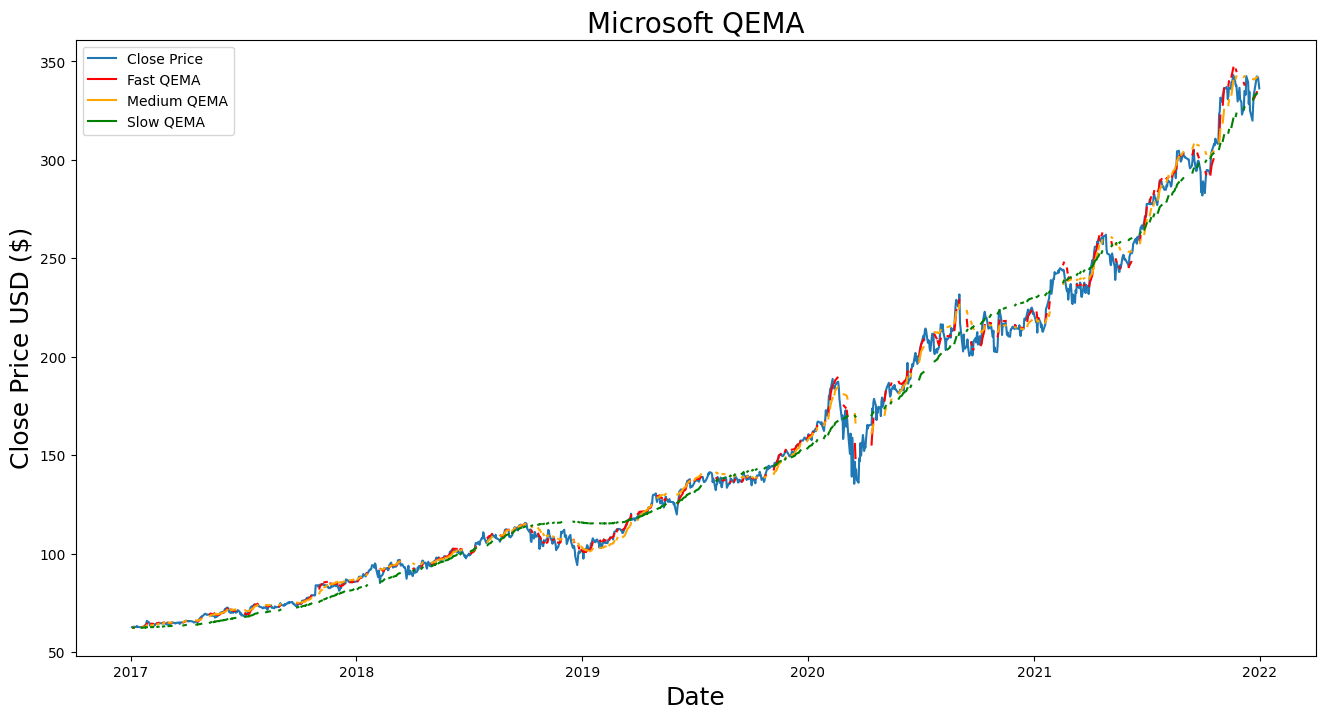

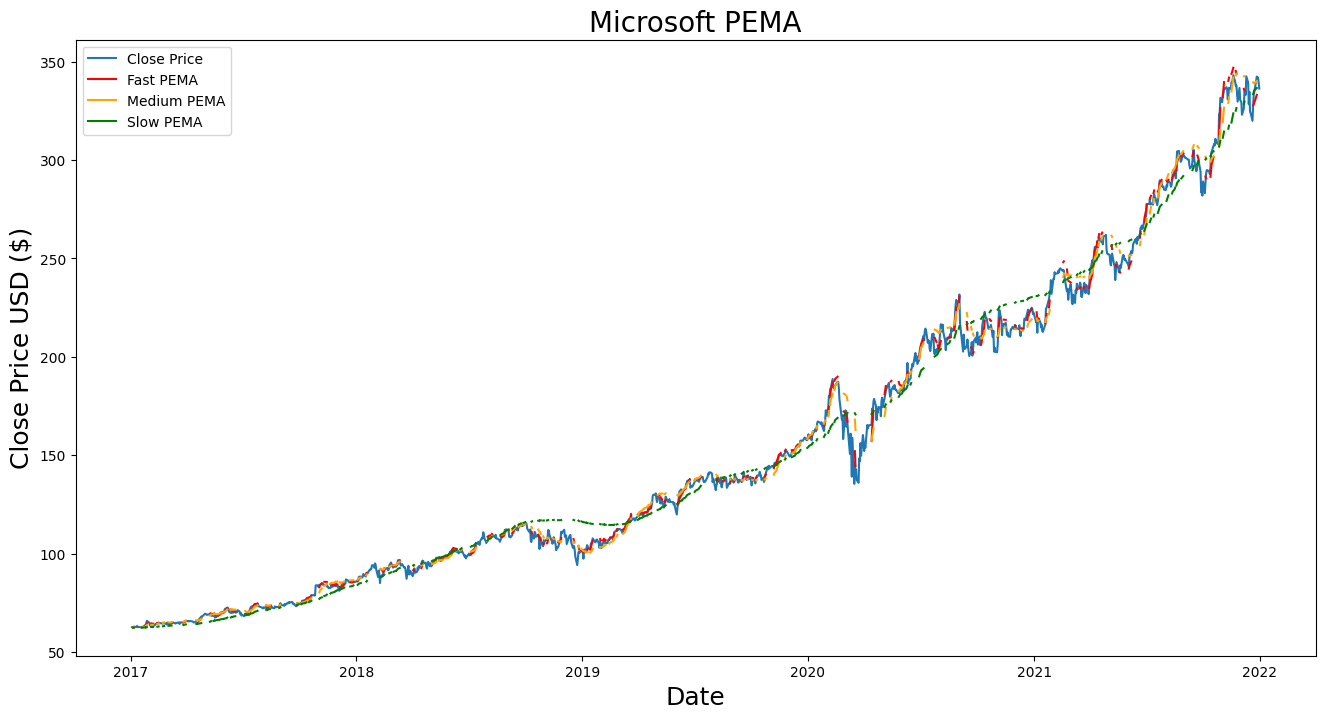

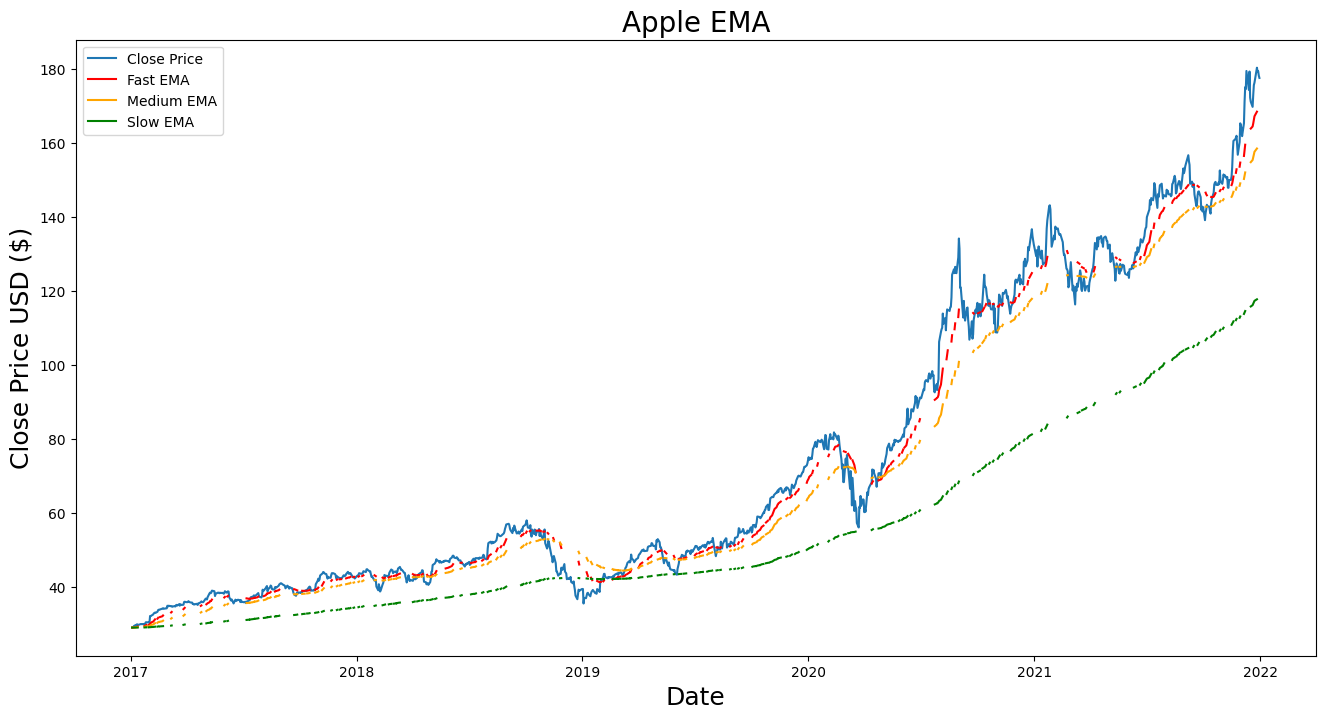

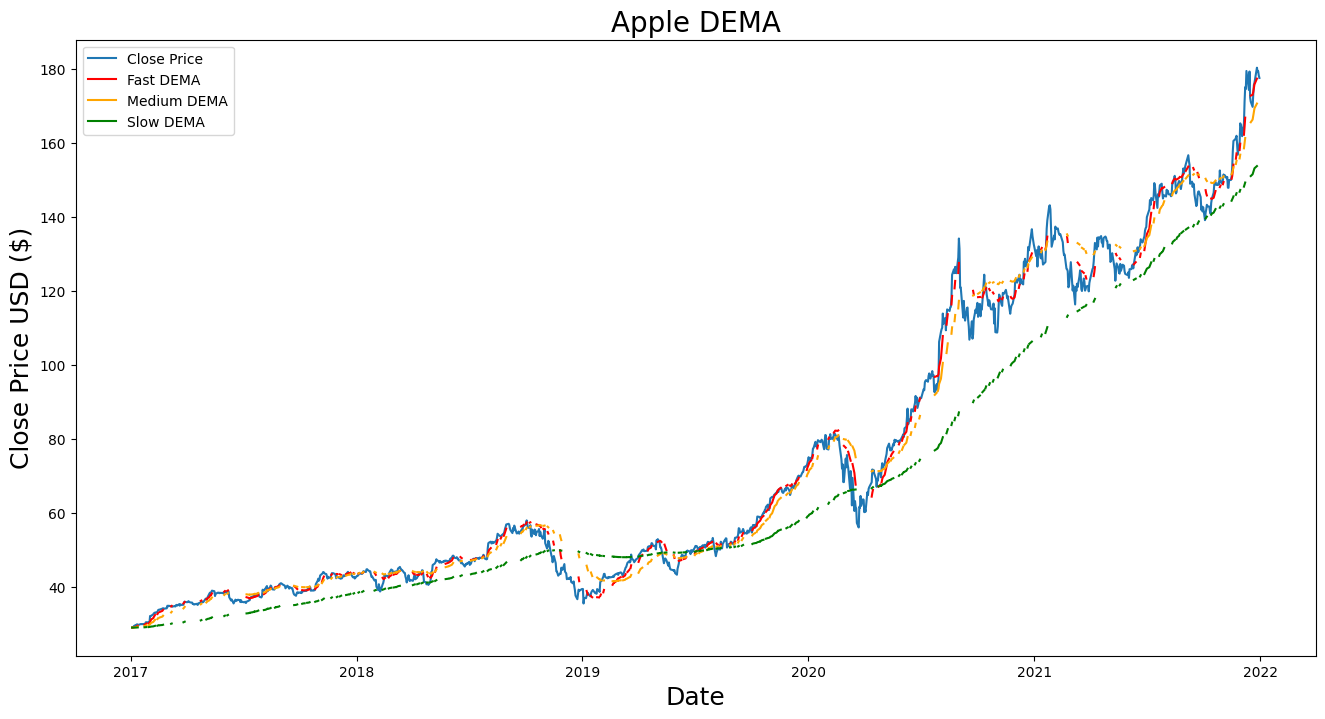

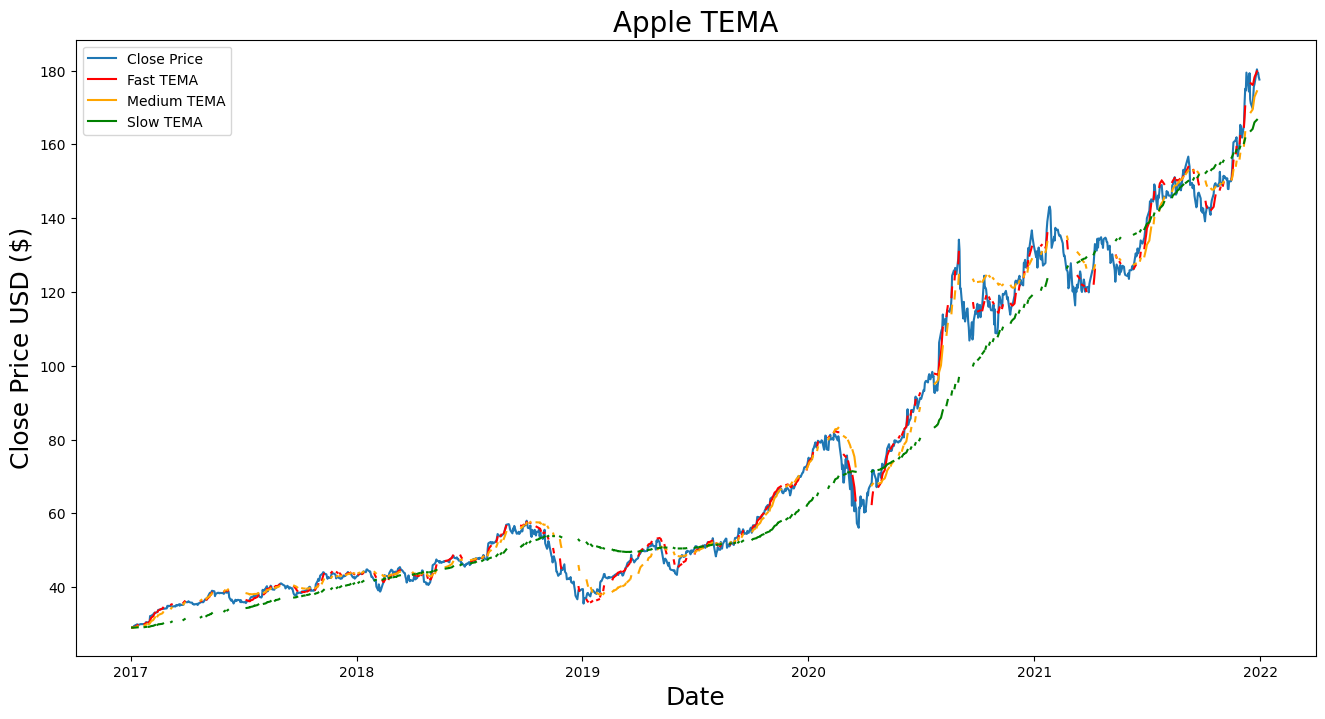

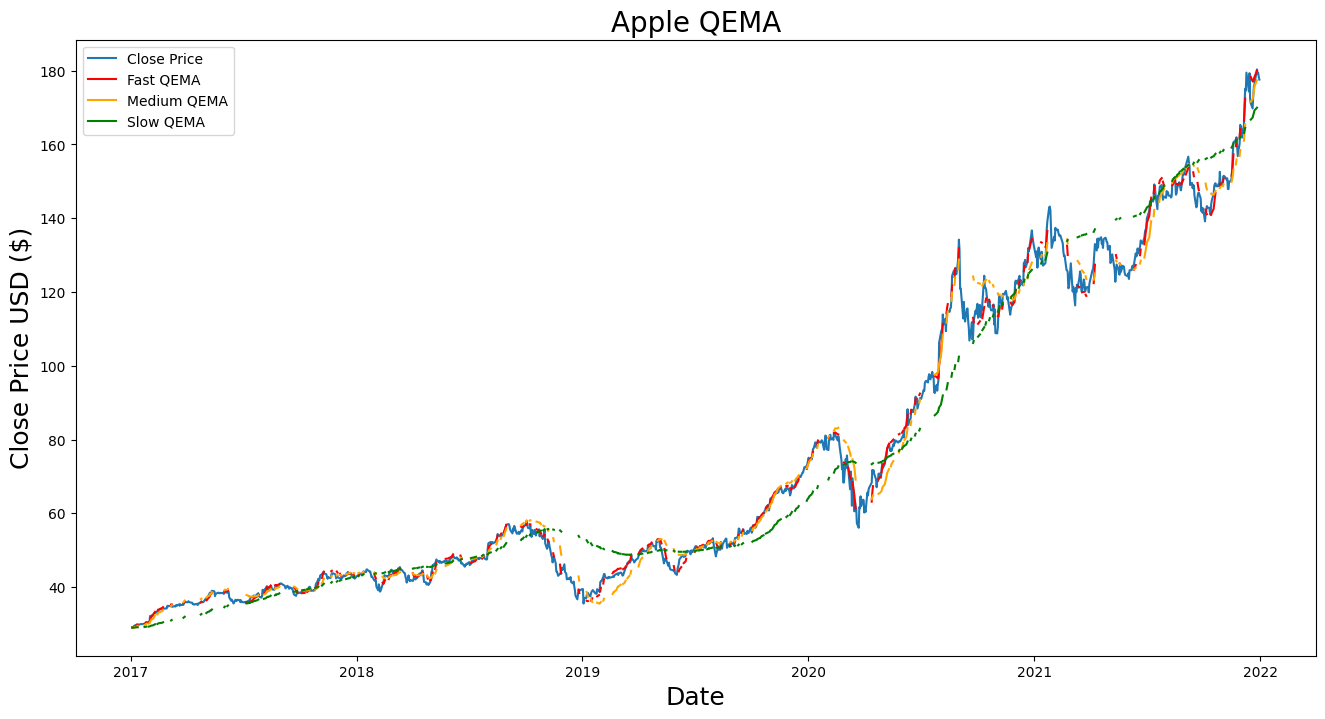

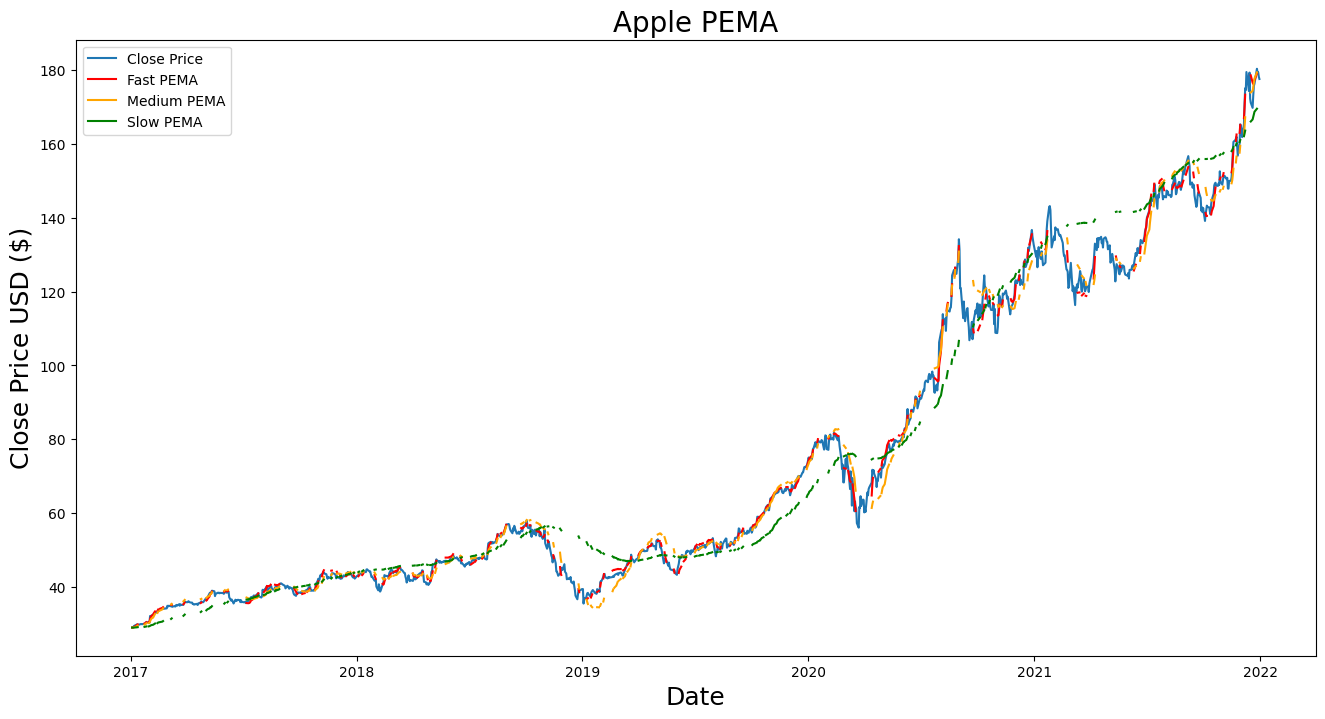

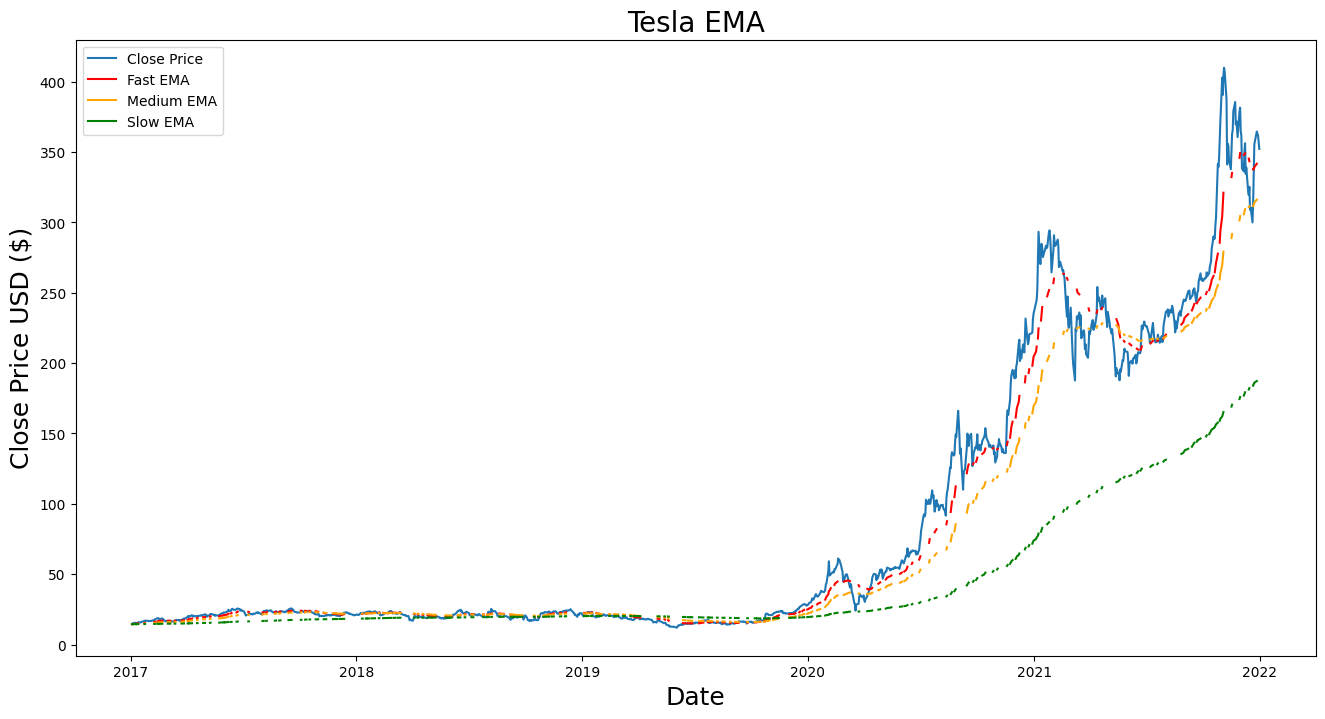

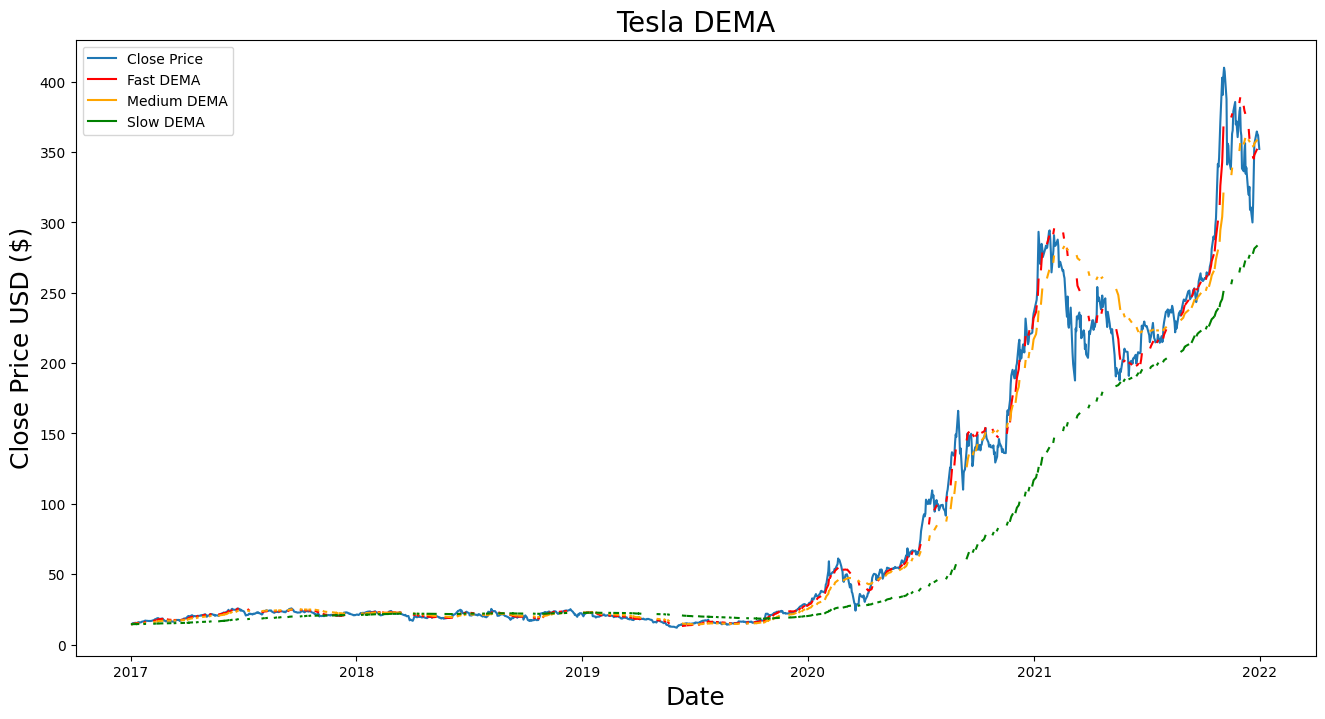

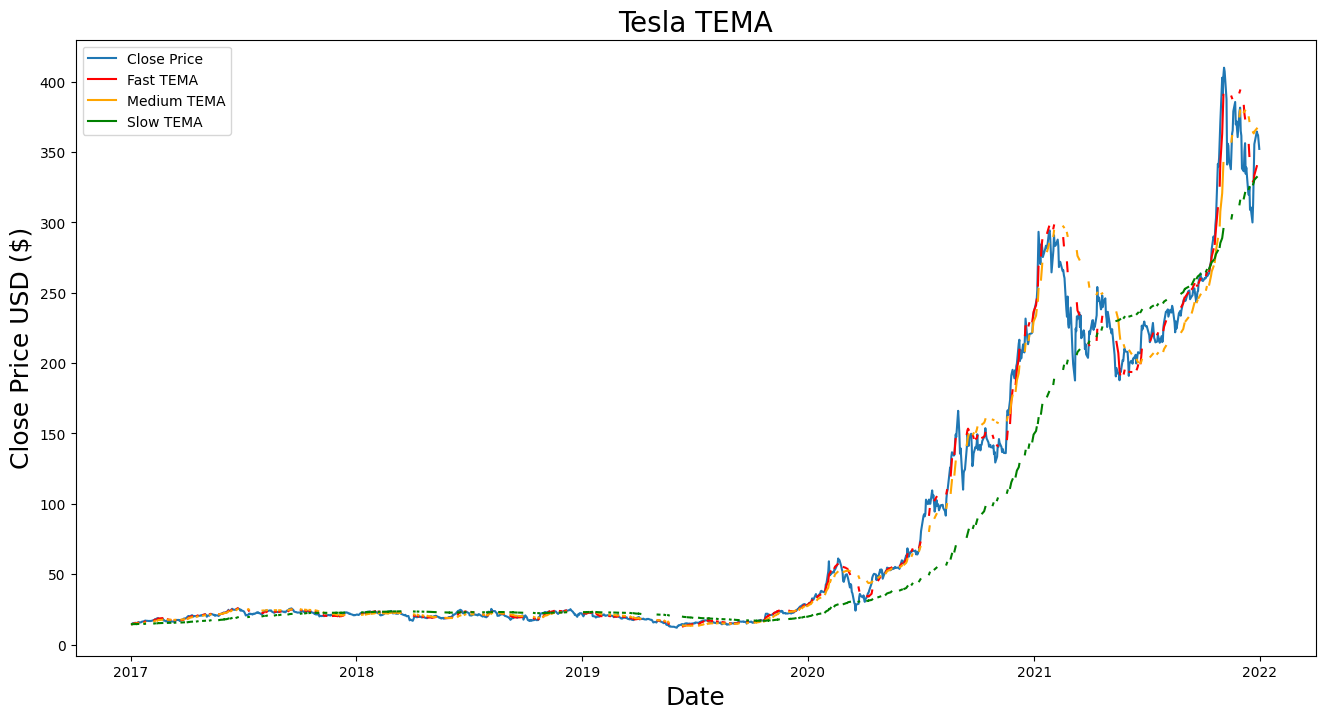

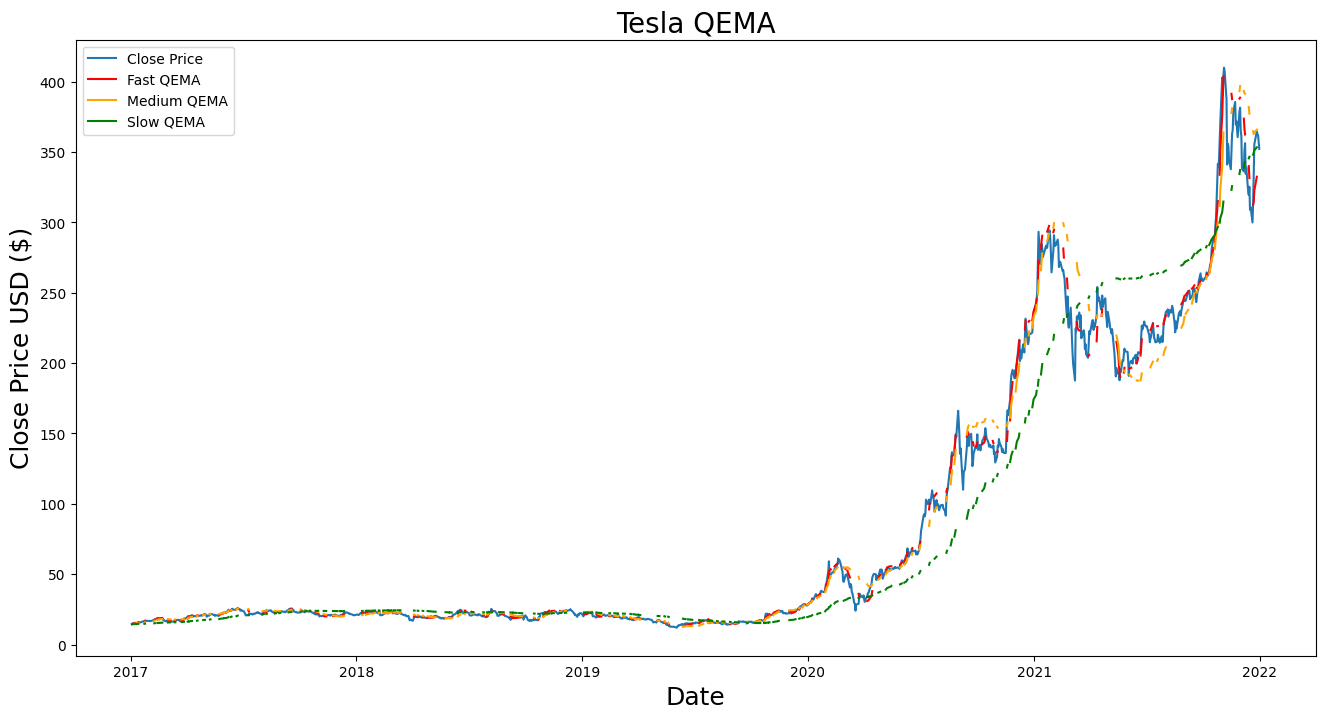

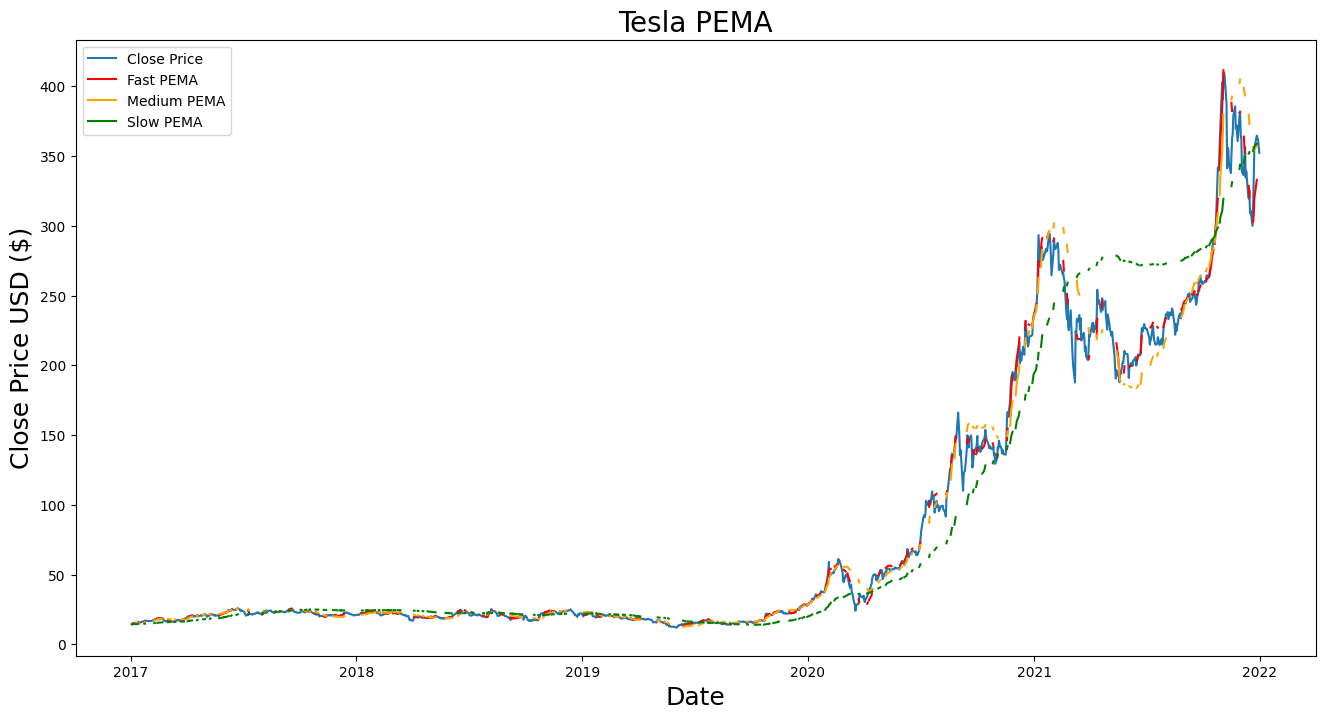

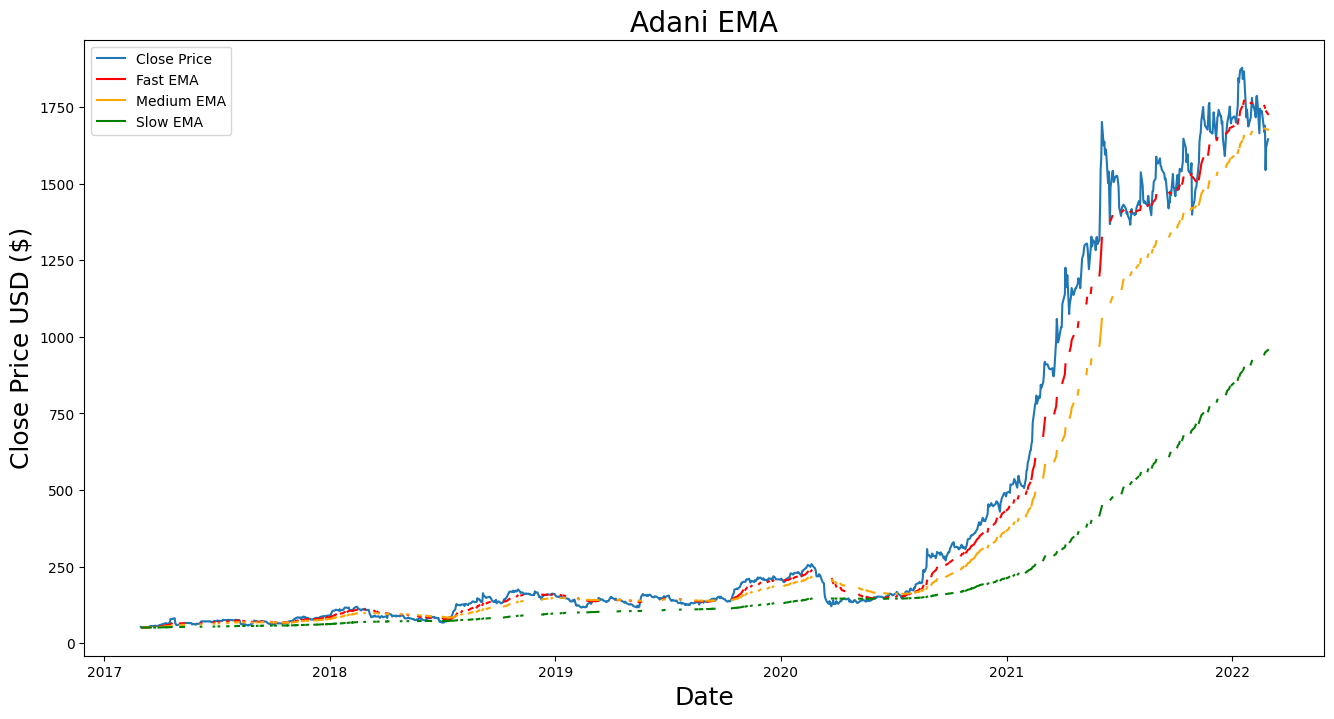

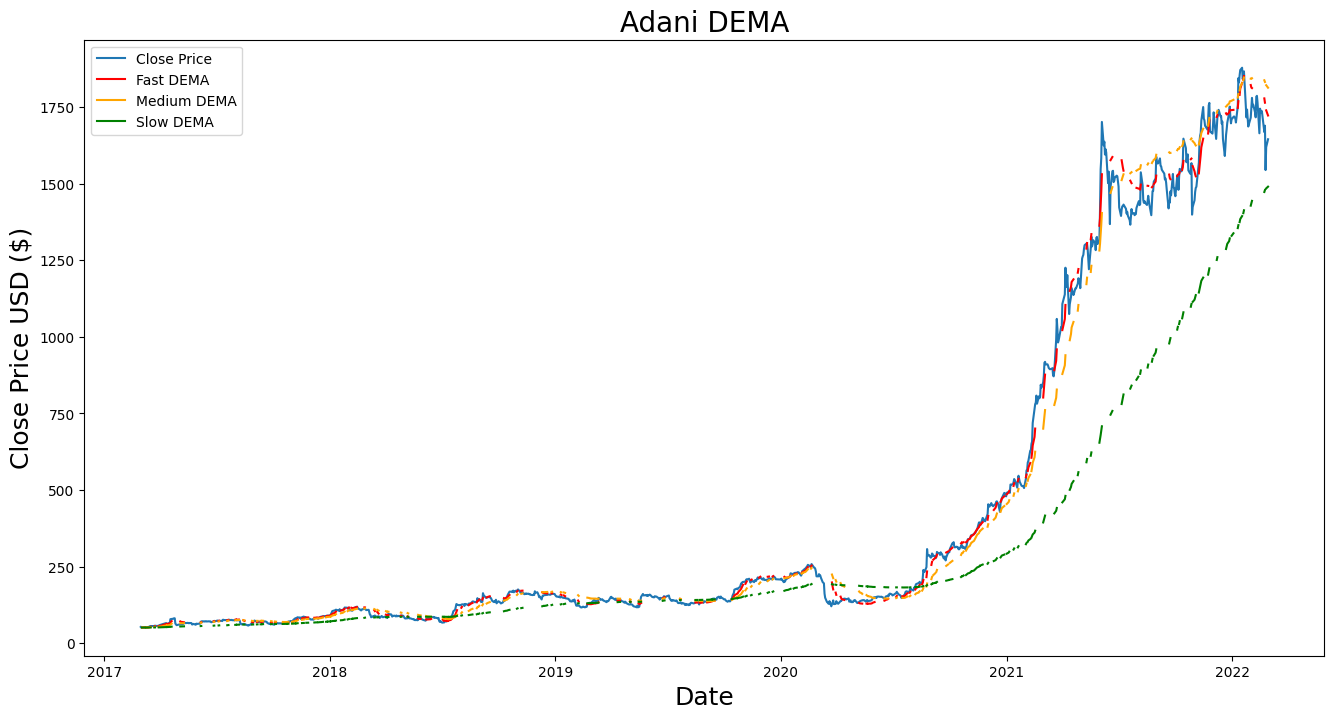

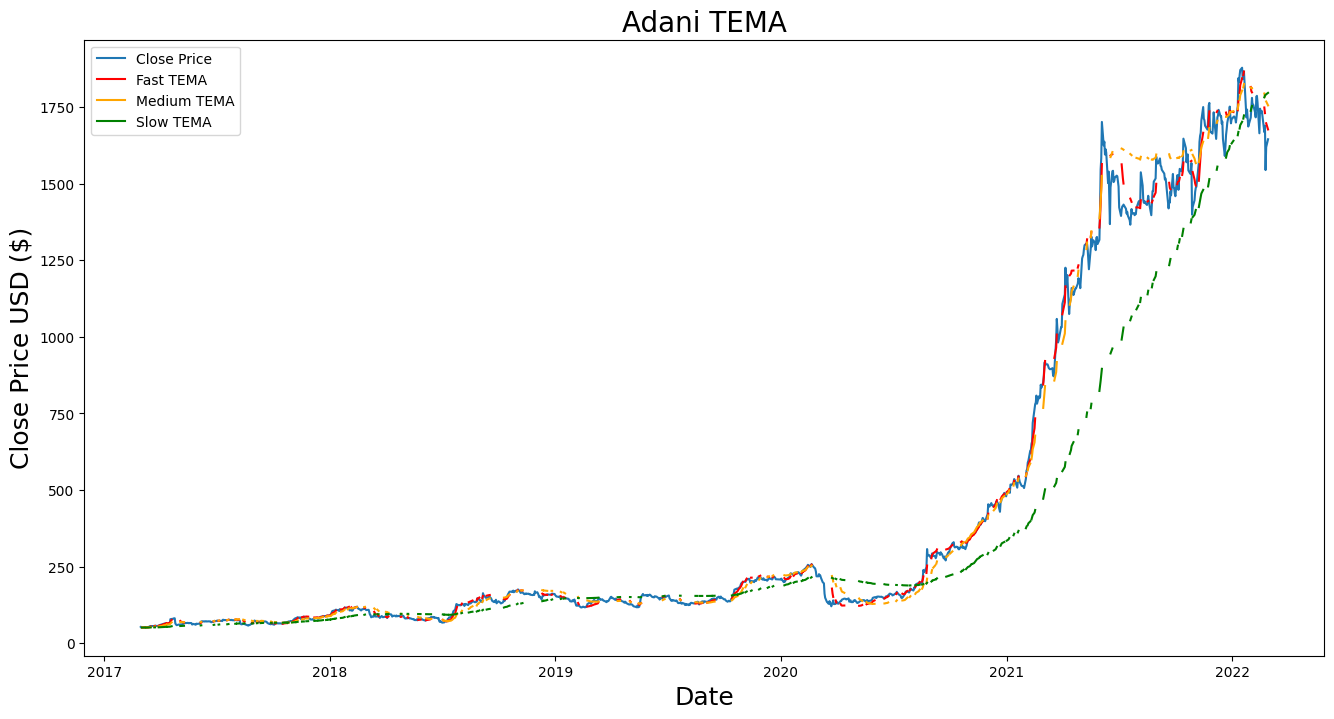

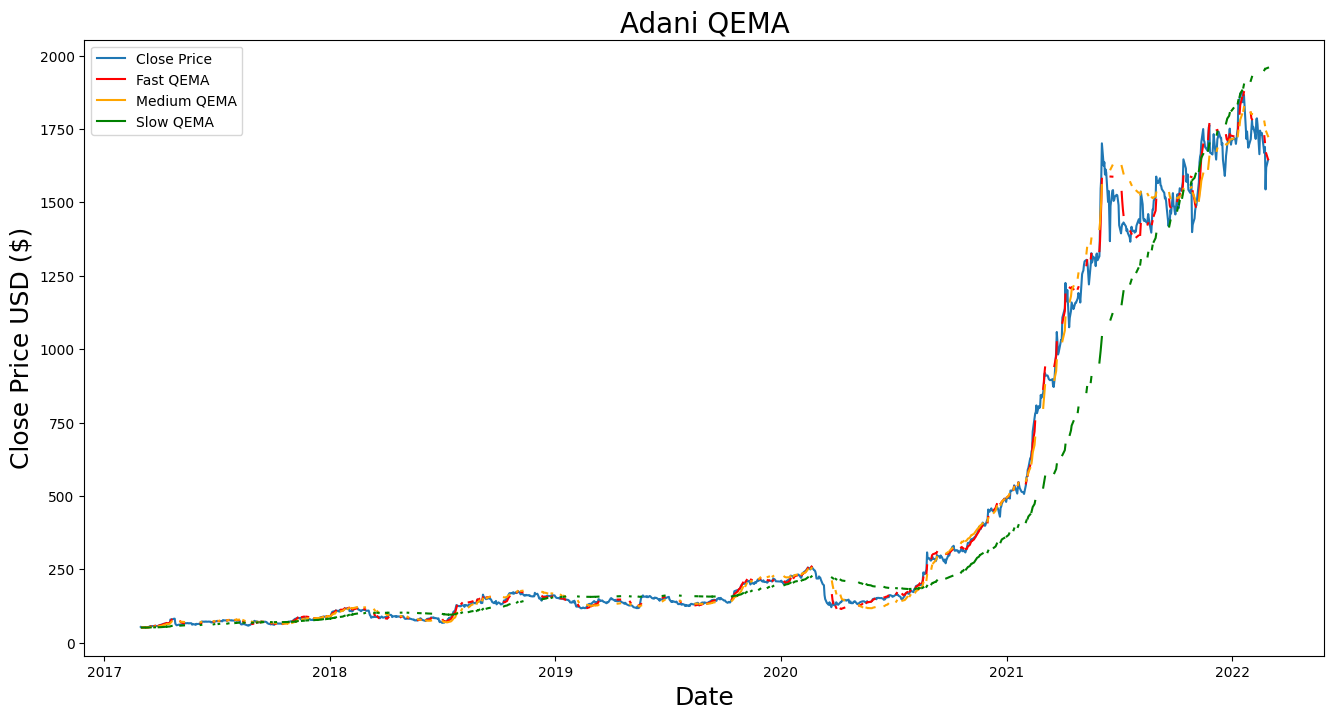

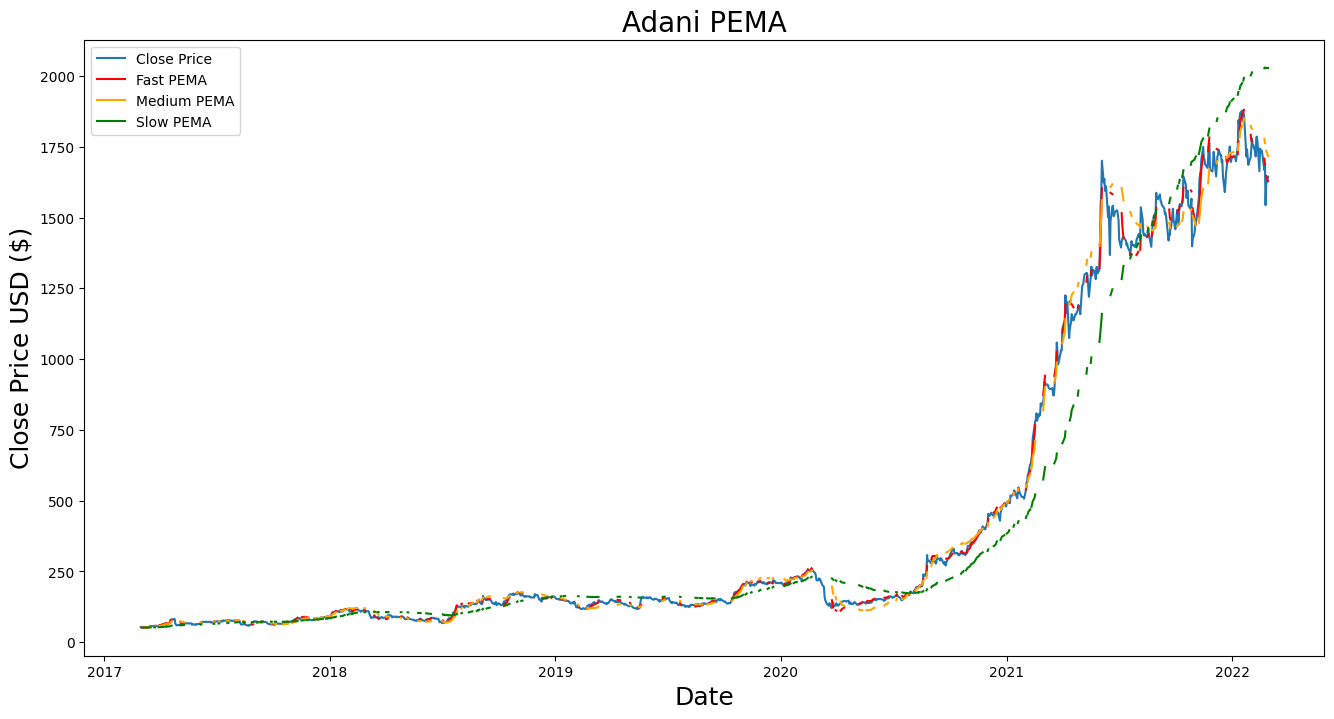

In [5]:
for i in [(GOOGL, 'Google'), (MSFT, 'Microsoft'), (AAPL, 'Apple') , (TSLA, 'Tesla'), (ADANI, 'Adani')]:
    EMA_func(i[0], i[1])
    DEMA_func(i[0], i[1])
    TEMA_func(i[0], i[1])
    QEMA_func(i[0], i[1])
    PEMA_func(i[0], i[1])
    # RSI_func(i[0], i[1])

## Trading Strategy
My trading strategy is primarily a three-moving average crossover strgtegy using various exponentially moving averages.  By using multiple strategies for each stock, I am able to maximise returns by observing the historical performance of a stock under said strategy. In this strategy, I am computing the ratio of number of days the closing price of a particular stock closed above its opening price to the total number of days considered. This ratio is calculated for 20 and 300 days respectively. My assumption is that the 20 days ratio would try to mimic the 300 day ratio. So if the 20 days ratio is less than the 300 days ratio, it is expected that the closing price of the stock would go higher. Accordingly long - short signals would be sent. 

In [6]:
def buy_sell_flags(data, key):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False

    for i in range(len(data)):
        if flag_short is False and data['Middle' + key][i] < data['Long' + key][i] and data['Middle' + key][i] > data['Short' + key][i]:
            if flag_long is True:
                buy_list.append(np.nan)
                sell_list.append(np.nan)
                flag_long = False
                flag_short = True
            else:
                buy_list.append(data['Close'][i])
                sell_list.append(np.nan)
                flag_short = True
        elif flag_long is False and data['Middle' + key][i] > data['Long' + key][i] and data['Middle' + key][i] < data['Short' + key][i]:
            if flag_short is True:
                buy_list.append(np.nan)
                sell_list.append(np.nan)
                flag_long = True
                flag_short = False
            else:
                buy_list.append(data['Close'][i])
                sell_list.append(np.nan)
                flag_long = True
        elif flag_short is True and (data['Short' + key][i] > data['Middle' + key][i] or data['Middle' + key][i] > data['Long' + key][i]):
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_short = False
        elif flag_long is True and (data['Short' + key][i] < data['Middle' + key][i] or data['Middle' + key][i] < data['Long' + key][i]):
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_long = False
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)

    data['Buy' + key] = buy_list
    data['Sell' + key] = sell_list

In [7]:
def display_buy_sell_flags(data, stock, key) :
    plt.figure(figsize=(16,8))
    plt.plot(data['Buy' + key], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
    plt.plot(data['Sell' + key], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
    plt.plot(data['Short' + key], label='Fast', color = 'red', alpha = 0.35)
    plt.plot(data['Middle' + key], label='Medium', color = 'orange', alpha = 0.35)
    plt.plot(data['Long' + key], label='Slow', color = 'green', alpha = 0.35)
    plt.plot(data['Close'],  label='Closing Price', alpha = 0.35)
    plt.title(stock + ' Buy and Sell Signals (' + key[1:] + ')', fontsize = 20)
    plt.xlabel('Date',fontsize=18)
    plt.ylabel('Close Price USD ($)',fontsize=18)
    plt.legend( loc='best')
    plt.show()

### Generating trade signals

In [8]:
def trade_signals (data, key):
    trade = []
    trade_result=[]
    avg_buyprice=0.0
    stock_held=0
    for i in range(0,len(data)):
            if (np.isnan(data['Buy' + key][i]) ^ np.isnan(data['Sell' + key][i])):
                if np.isnan(data['Buy' + key][i]):
                    trade.append('Sell')
                    # if(stock_held>0):
                    #     trade.append('Sell')
                    #     sell_price=data['Close'][i]
                    #     trade_results=(sell_price-avg_buyprice)*stock_held
                elif np.isnan(data['Sell' + key][i]):
                    trade.append('Buy')
                    # currPrice=data['Close'][i]
                    
            else:
                trade.append('None')
    data['Trade_Signals' + key] = trade

### Calculating necessary functions like returns, drawdown, etc. 

In [21]:
def returns (data, key, investment, r):
    buy_price = 0
    returns = [0]
    qty_hold = int(investment * (1-r)/data['Close'][0])
    trade = False
    for i in range(1,len(data)):
            if data['Trade_Signals' + key][i] == 'Buy' and trade == False:
                qty_ma = int(investment * r/data['Close'][i])
                returns.append((data['Close'][i] - data['Close'][i-1])*qty_hold)
                trade = True
            elif data['Trade_Signals' + key][i] == 'Sell' and trade == True:
                returns.append((data['Close'][i] - data['Close'][i-1])*(qty_hold + qty_ma))
                trade = False
            elif trade == True:
                returns.append((data['Close'][i] - data['Close'][i-1])*(qty_hold + qty_ma))
            else :
                returns.append((data['Close'][i] - data['Close'][i-1])*qty_hold)
    data['Returns' + key] = returns
    data ['Cumulative_Returns' + key] = data['Returns' + key].cumsum()

def net_return (data, key):
    return data['Cumulative_Returns' + key][len(data)-1]

def benchmark_returns(data,key):
    num=(investment/data['Close'][0])
    amt=(num*data['Close'][len(data)-1])-investment
    return amt

def final_value (data, key, investment):
    return net_return(data, key) + investment

def annual_ROI (data, key, investment):
    return 100*(pow(final_value(data, key, investment)/investment, 1/5)- 1)

def ROI (data, key, investment):
    return 100*(net_return(data, key))/investment

def sharpe_ratio (data, key, investment):
    mean =np.nanmean(data['Returns' + key]) * 252
    sigma = np.nanstd(data['Returns' + key]) * np.sqrt(252)
    sharpe_ratio = mean / sigma
    return sharpe_ratio

def drawdown_ratio(data, key):
    Cum_Return = data['Cumulative_Returns' + key]
    Peak = np.maximum.accumulate(Cum_Return)
    Drawdown = Peak - Cum_Return
    Max_Drawdown = np.max(Drawdown)
    Avg_Drawdown = np.mean(Drawdown[Drawdown > 0])
    if Max_Drawdown != 0 :
        return Avg_Drawdown/Max_Drawdown
    else :
        return np.nan

def min_max_number_trades (data, key, r):
    trade_values = []
    count = 0
    trade = False
    for i in range(1,len(data)):
            if data['Trade_Signals' + key][i] == 'Buy' and trade == False:
                qty_ma = int(investment * r/data['Close'][i])
                value = 0
                trade = True
                count += 1
            elif data['Trade_Signals' + key][i] == 'Sell' and trade == True:
                value += (data['Close'][i] - data['Close'][i-1])*(qty_ma)
                trade_values.append(value)
                trade = False
            elif trade == True:
                value += (data['Close'][i] - data['Close'][i-1])*(qty_ma)
    profit_trade=0
    for i in range(1,len(trade_values)):
        if trade_values[i]>0:
            profit_trade+=1
    return (np.min(trade_values), np.max(trade_values), count, profit_trade/len(trade_values) , len(trade_values)- profit_trade)


C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Cumulative_Returns' + key][len(data)-1]


220684.42430877686

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num=(investment/data['Close'][0])
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  amt=(num*data['Close'][len(data)-1])-investment


258540.11836178915

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\1291622770.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if flag_short is False and data['Middle' + key][i] < data['Long' + key][i] and data['Middle' + key][i] > data['Short' + key][i]:
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\1291622770.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif flag_long is False and data['Middle' + key][i] > data['Long' + key][i] and data['Middle' + key][i] < data['Short' + key][i]:
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\1291622770.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprec

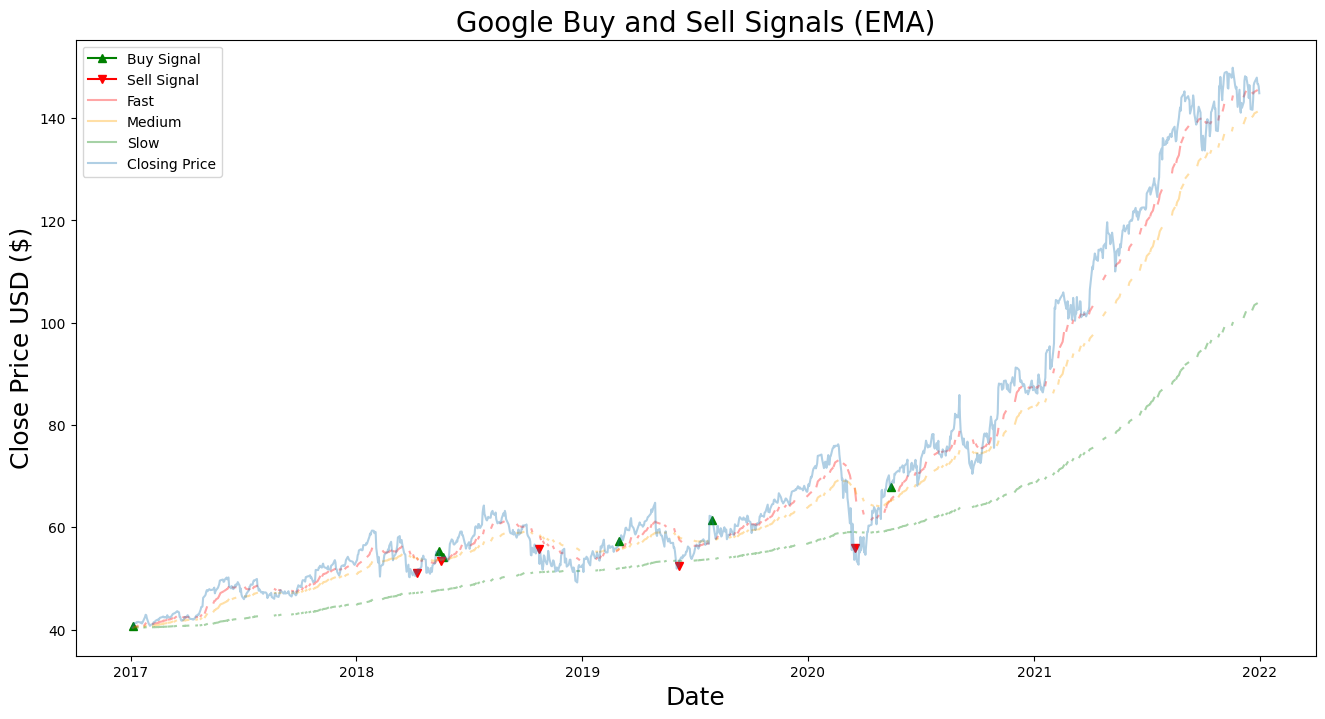

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\278998053.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (np.isnan(data['Buy' + key][i]) ^ np.isnan(data['Sell' + key][i])):
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\278998053.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif np.isnan(data['Sell' + key][i]):
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

'Google, 1, EMA : -8949.118682861328, 25459.257400512695, 6,0.2,4'

215863.3530883789

258540.11836178915

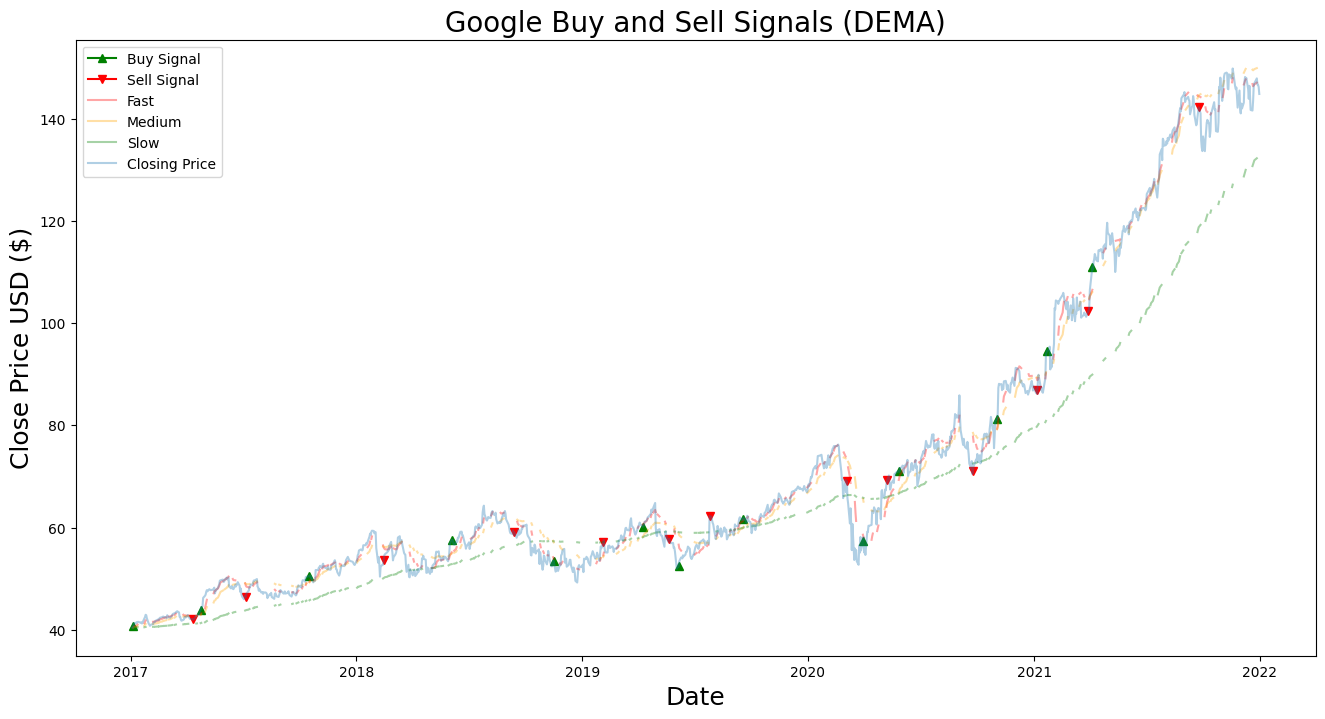

'Google, 1, DEMA : -3892.40242767334, 28171.565460205078, 13,0.8461538461538461,2'

147154.6819000244

258540.11836178915

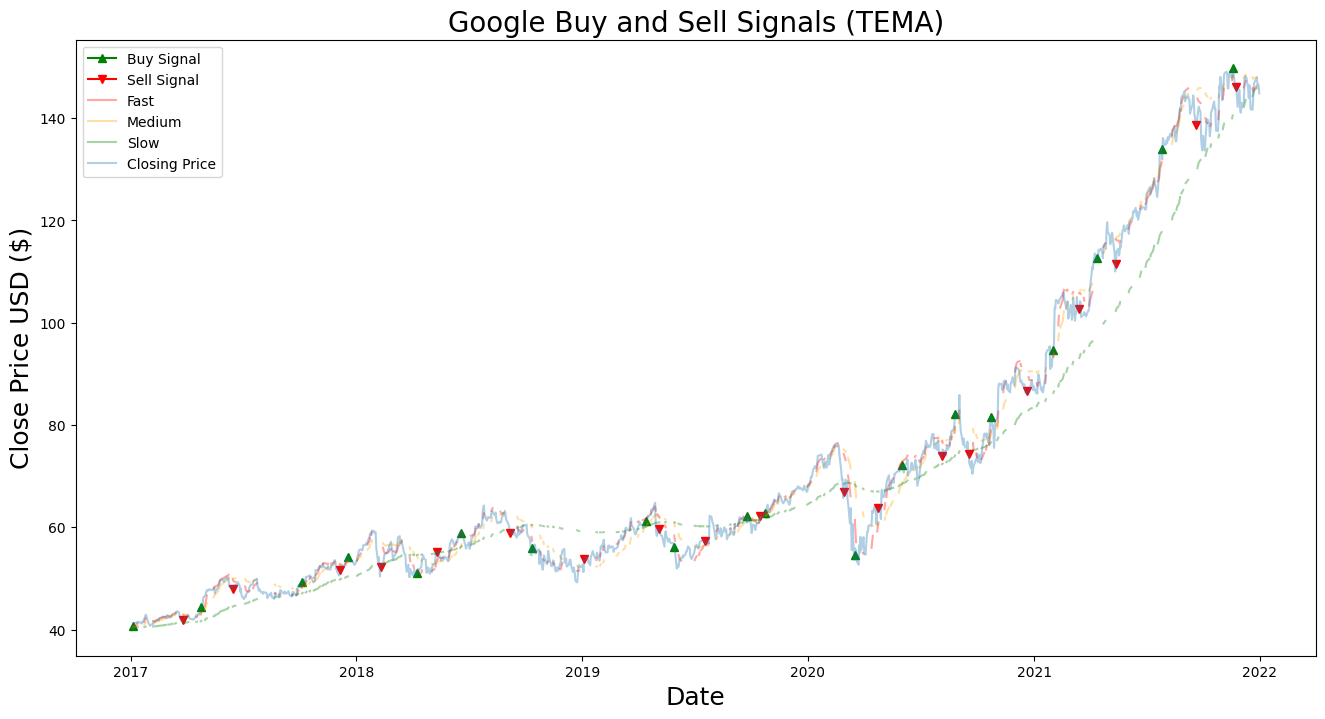

'Google, 1, TEMA : -9551.07177734375, 16983.55633544922, 19,0.5263157894736842,9'

132461.39937973022

258540.11836178915

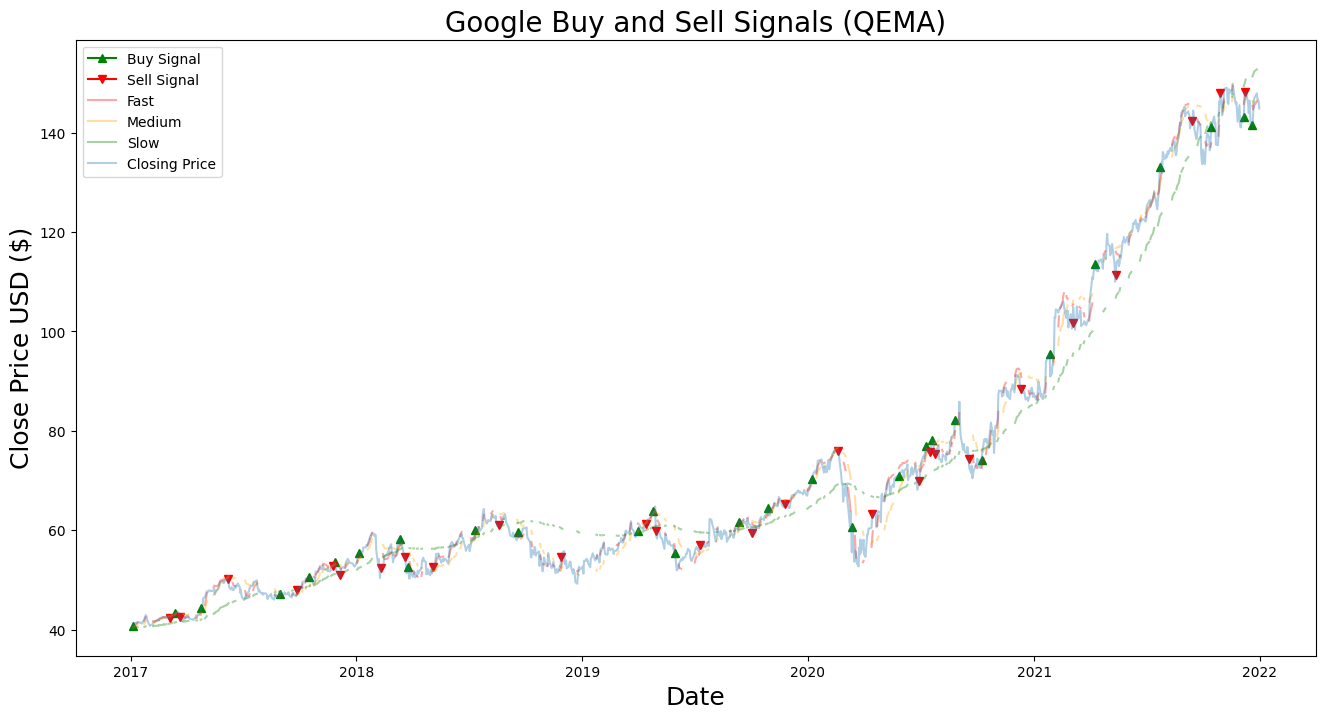

'Google, 1, QEMA : -9551.07177734375, 19156.426025390625, 29,0.5,14'

165030.1566505432

258540.11836178915

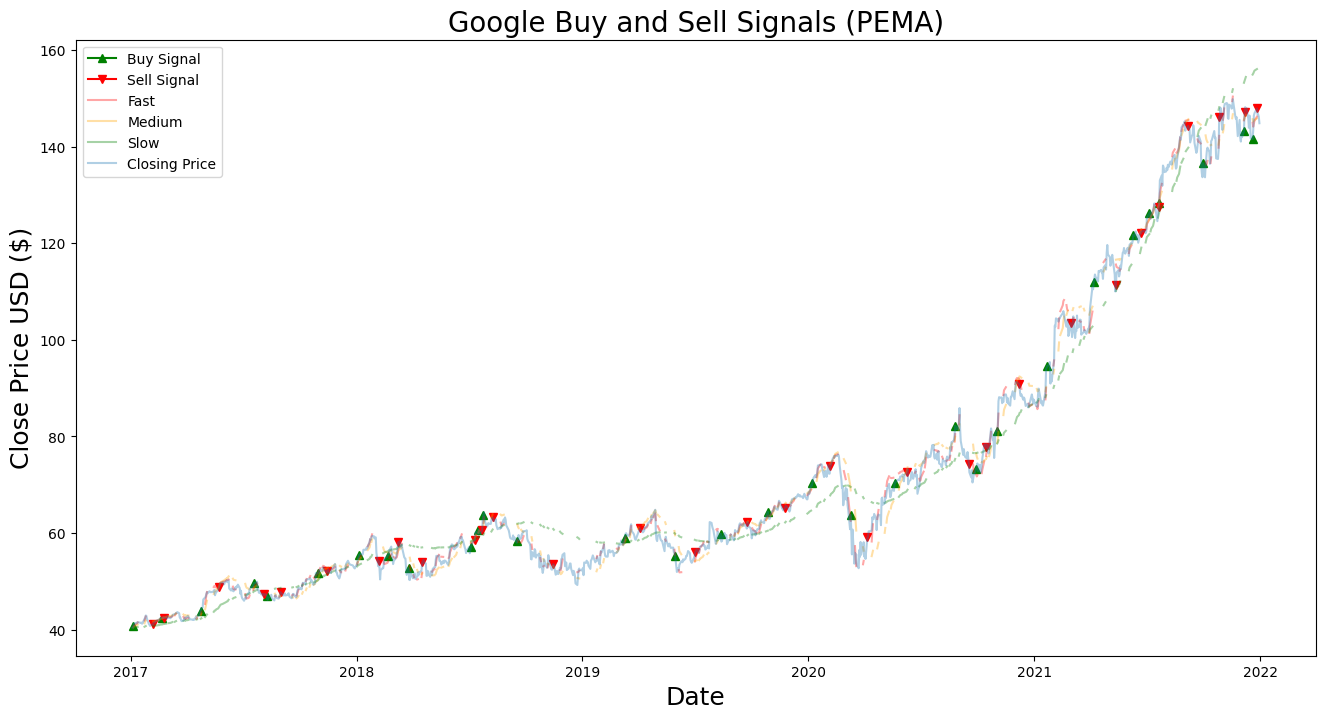

'Google, 1, PEMA : -9551.07177734375, 12338.308837890625, 31,0.6774193548387096,10'

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03   40.030998   40.571999   39.844501   40.400501   40.400501   
2017-01-04   40.494499   40.671501   40.205502   40.388500   40.388500   
2017-01-05   40.375000   40.687000   40.296001   40.651001   40.651001   
2017-01-06   40.749500   41.448002   40.575001   41.260502   41.260502   
2017-01-09   41.318501   41.521500   41.081001   41.359001   41.359001   
...                ...         ...         ...         ...         ...   
2021-12-27  147.255997  148.343994  147.169495  147.906494  147.906494   
2021-12-28  148.235992  148.298996  146.054504  146.686996  146.686996   
2021-12-29  146.644501  147.417007  145.647507  146.654999  146.654999   
2021-12-30  146.694000  147.300003  145.994507  146.200500  146.200500   
2021-12-31  146.050003  146.698502  144.852005  144.852005  144.852005   

              Volume   Short_EMA  Middle_EMA    Long_EMA  Short_DEMA  ...  \
Date                                                                  ...   
2017-01-03  39180000   40.400501   40.400501   40.400501   40.400501  ...   
2017-01-04  30306000         NaN         NaN         NaN         NaN  ...   
2017-01-05  26810000   40.424358   40.410325   40.402166   40.445943  ...   
2017-01-06  40342000   40.503991   40.443665   40.407869   40.595569  ...   
2017-01-09  28178000   40.585421   40.479561   40.414189   40.741951  ...   
...              ...         ...         ...         ...         ...  ...   
2021-12-27  15976000  145.388510  141.175104  103.739516  147.068947  ...   
2021-12-28  18200000         NaN         NaN         NaN         NaN  ...   
2021-12-29  17788000  145.509128  141.390002  104.024668  147.138654  ...   
2021-12-30  15688000         NaN         NaN         NaN         NaN  ...   
2021-12-31  18136000         NaN         NaN         NaN         NaN  ...   

             Buy_QEMA  Sell_QEMA  Trade_Signals_QEMA  Returns_QEMA  \
Date                                                                 
2017-01-03        NaN        NaN                None      0.000000   
2017-01-04        NaN        NaN                None     -0.000000   
2017-01-05  40.651001        NaN                 Buy      0.000000   
2017-01-06        NaN        NaN                None   1498.762676   
2017-01-09        NaN        NaN                None    242.209774   
...               ...        ...                 ...           ...   
2021-12-27        NaN        NaN                None    698.933105   
2021-12-28        NaN        NaN                None   -860.965363   
2021-12-29        NaN        NaN                None    -22.590363   
2021-12-30        NaN        NaN                None   -320.875793   
2021-12-31        NaN        NaN                None   -952.037811   

            Cumulative_Returns_QEMA   Buy_PEMA   Sell_PEMA  \
Date                                                         
2017-01-03                 0.000000        NaN         NaN   
2017-01-04                 0.000000        NaN         NaN   
2017-01-05                 0.000000  40.651001         NaN   
2017-01-06              1498.762676        NaN         NaN   
2017-01-09              1740.972450        NaN         NaN   
...                             ...        ...         ...   
2021-12-27             34617.868710        NaN  147.906494   
2021-12-28             33756.903347        NaN         NaN   
2021-12-29             33734.312984        NaN         NaN   
2021-12-30             33413.437191        NaN         NaN   
2021-12-31             32461.399380        NaN         NaN   

            Trade_Signals_PEMA  Returns_PEMA  Cumulative_Returns_PEMA  
Date                                                                   
2017-01-03                None      0.000000                 0.000000  
2017-01-04                None     -0.000000                 0.000000  
2017-01-05                 Buy      0.000000   

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Cumulative_Returns' + key][len(data)-1]


367181.3492164612

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num=(investment/data['Close'][0])
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  amt=(num*data['Close'][len(data)-1])-investment


437424.0931346911

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\1291622770.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if flag_short is False and data['Middle' + key][i] < data['Long' + key][i] and data['Middle' + key][i] > data['Short' + key][i]:
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\1291622770.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif flag_long is False and data['Middle' + key][i] > data['Long' + key][i] and data['Middle' + key][i] < data['Short' + key][i]:
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\1291622770.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprec

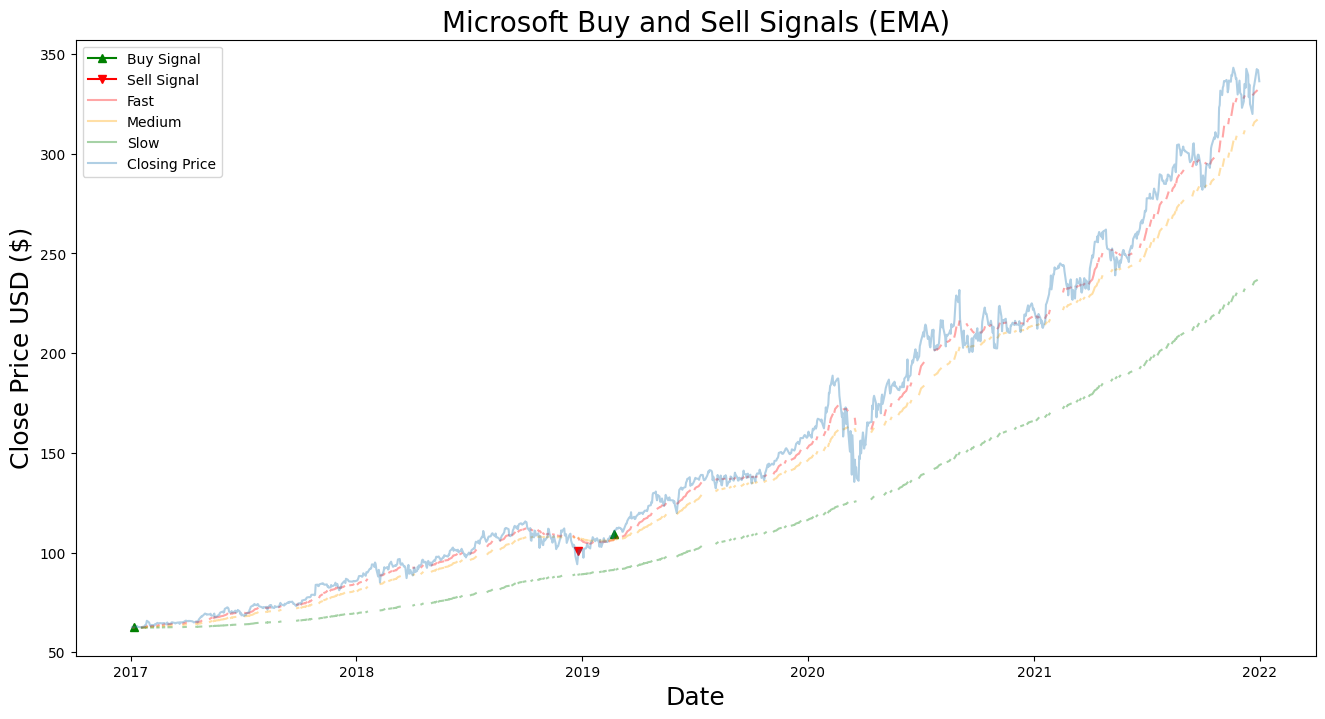

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\278998053.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (np.isnan(data['Buy' + key][i]) ^ np.isnan(data['Sell' + key][i])):
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\278998053.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif np.isnan(data['Sell' + key][i]):
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

'Microsoft, 1, EMA : 60012.51587295532, 60012.51587295532, 2,0.0,1'

180533.11660385132

437424.0931346911

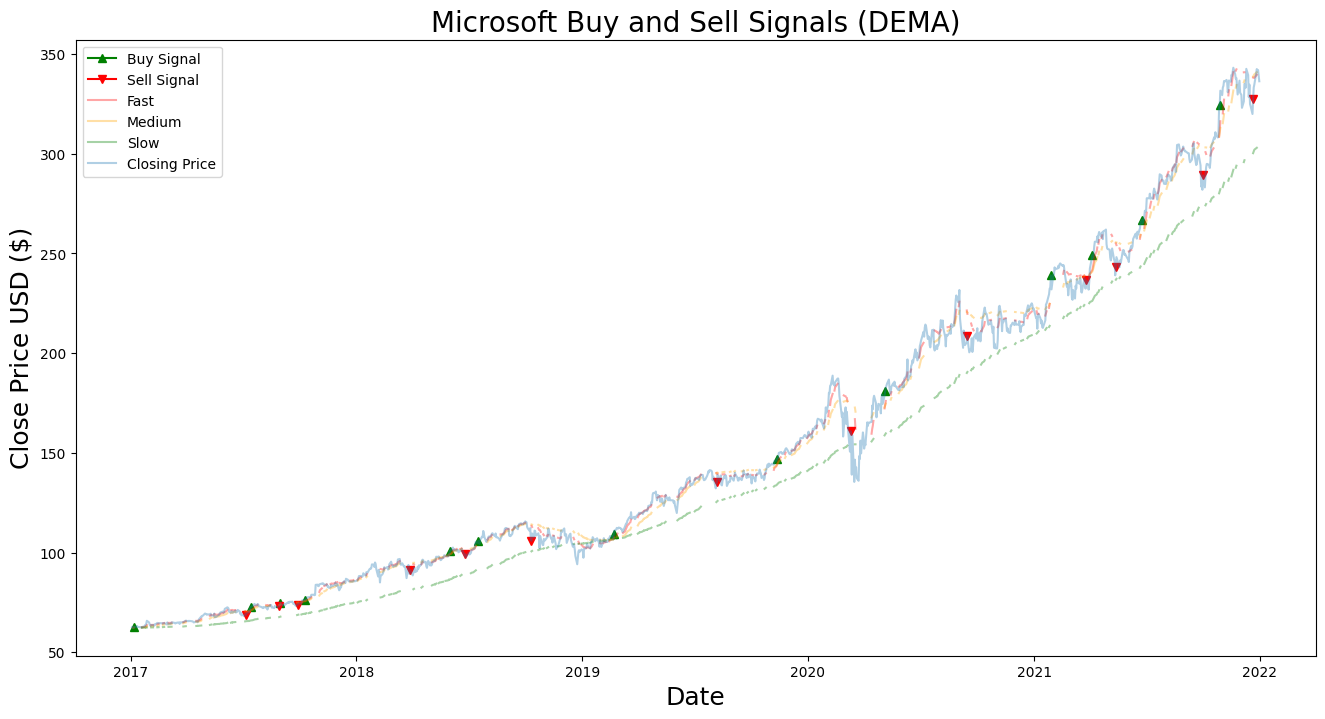

'Microsoft, 1, DEMA : -2422.043426513672, 23619.305541992188, 13,0.5384615384615384,6'

175936.83977127075

437424.0931346911

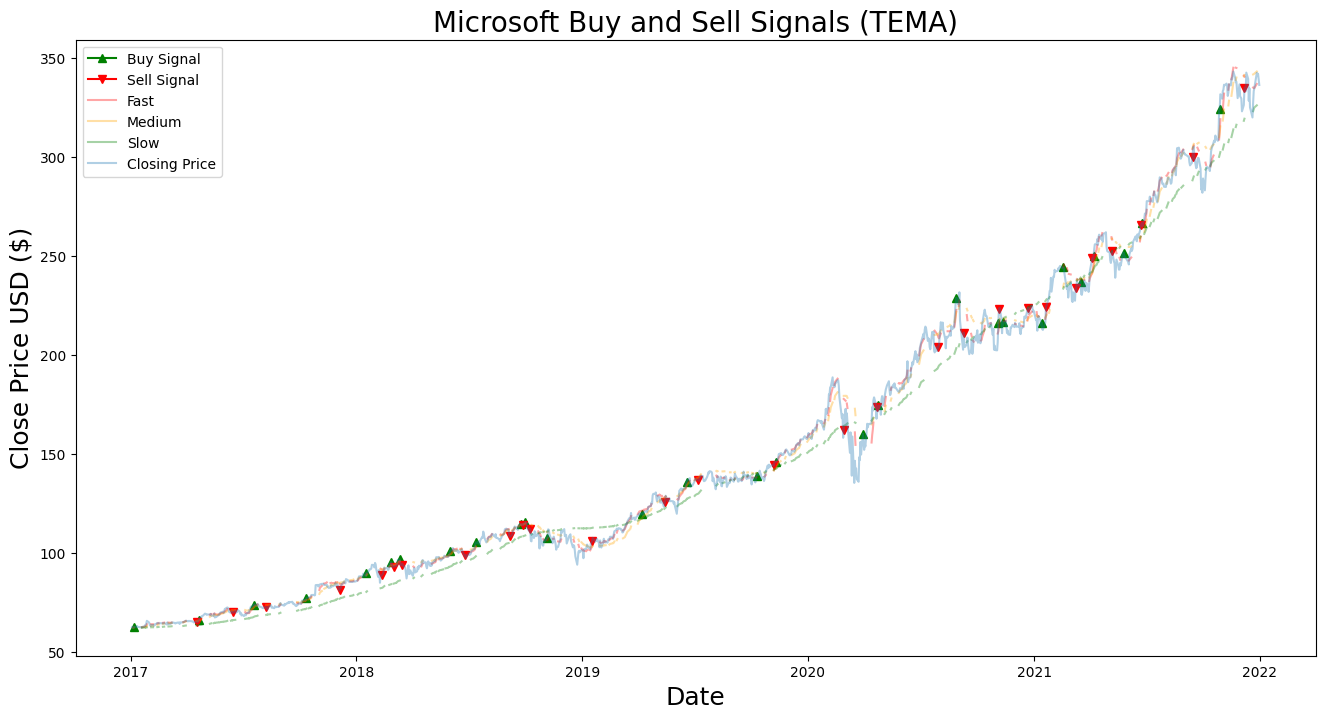

'Microsoft, 1, TEMA : -7682.324523925781, 16879.716857910156, 28,0.6071428571428571,11'

170338.30430984497

437424.0931346911

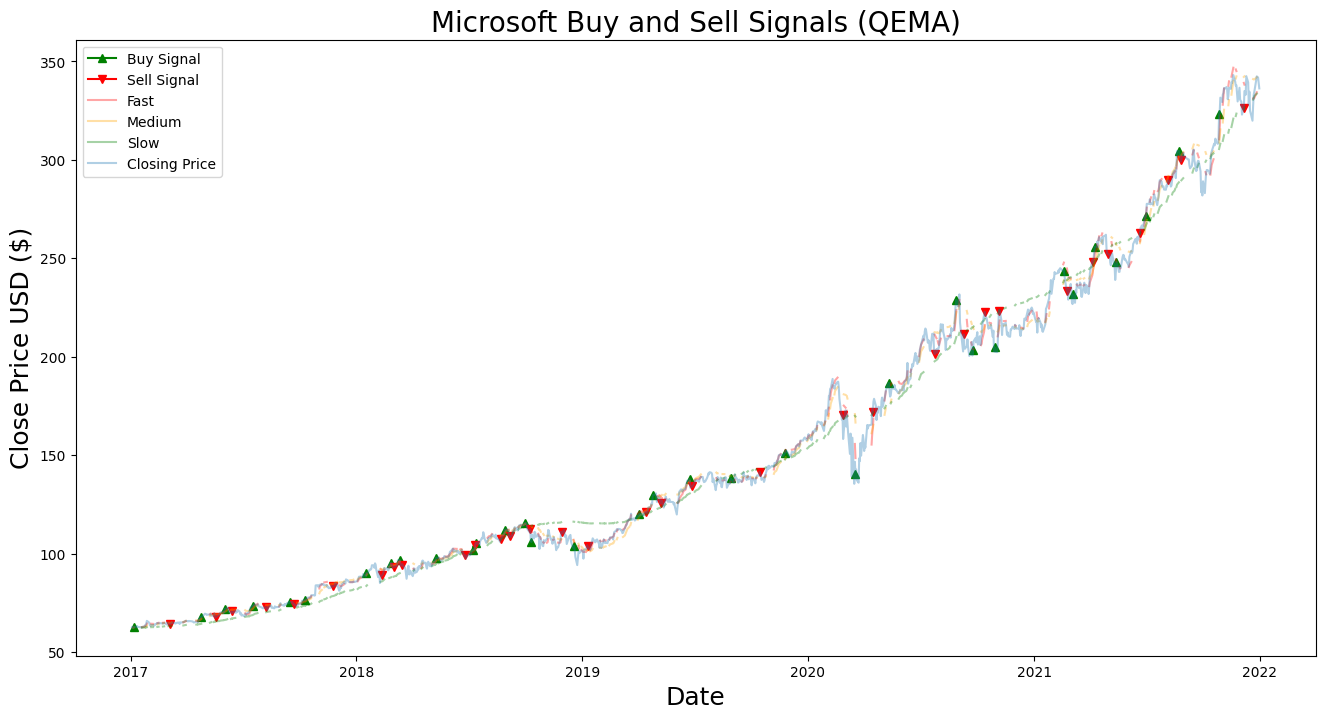

'Microsoft, 1, QEMA : -7682.324523925781, 22413.767822265625, 33,0.5151515151515151,16'

196577.8908958435

437424.0931346911

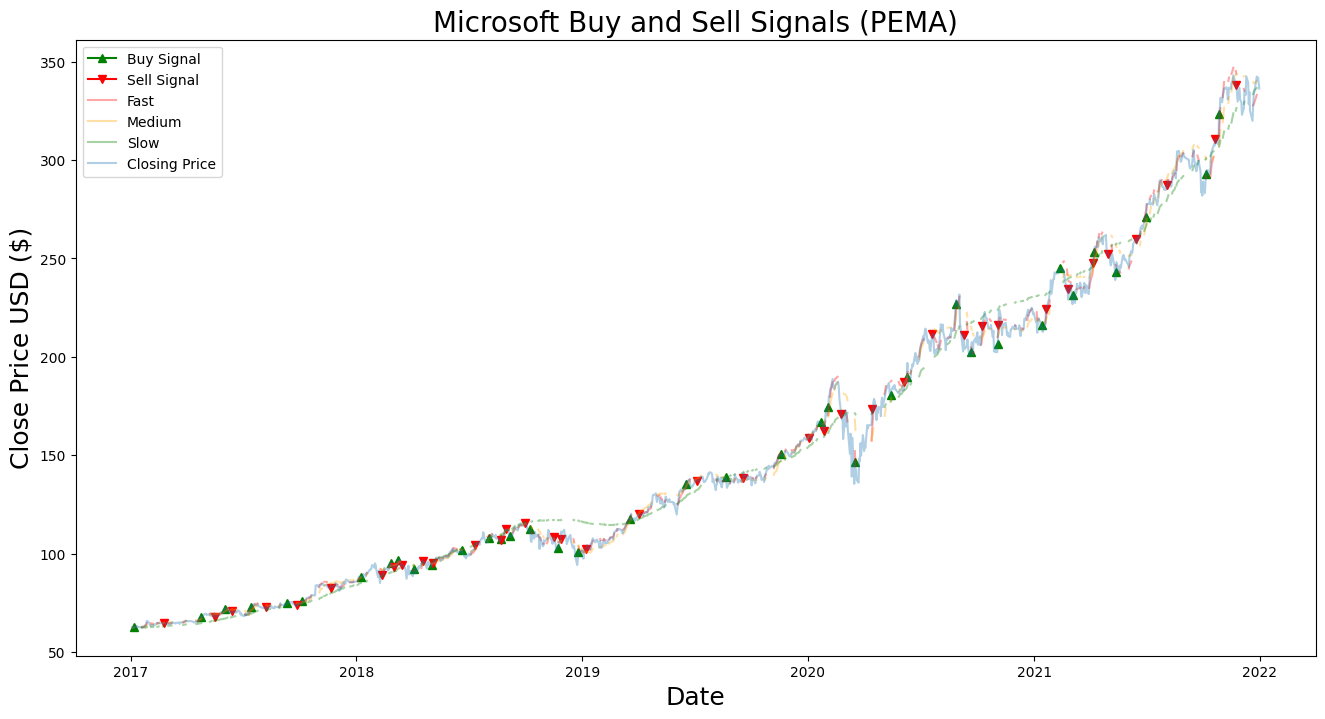

'Microsoft, 1, PEMA : -6742.893768310547, 18502.652923583984, 38,0.6578947368421053,13'

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03   62.790001   62.840000   62.130001   62.580002   57.254704   
2017-01-04   62.480000   62.750000   62.119999   62.299999   56.998520   
2017-01-05   62.189999   62.660000   62.029999   62.299999   56.998520   
2017-01-06   62.299999   63.150002   62.040001   62.840000   57.492573   
2017-01-09   62.759998   63.080002   62.540001   62.639999   57.309589   
...                ...         ...         ...         ...         ...   
2021-12-27  335.459991  342.480011  335.429993  342.450012  336.971680   
2021-12-28  343.149994  343.809998  340.320007  341.250000  335.790894   
2021-12-29  341.299988  344.299988  339.679993  341.950012  336.479736   
2021-12-30  341.910004  343.130005  338.820007  339.320007  333.891754   
2021-12-31  338.510010  339.359985  335.850006  336.320007  330.939758   

              Volume   Short_EMA  Middle_EMA    Long_EMA  Short_DEMA  ...  \
Date                                                                  ...   
2017-01-03  20694100         NaN         NaN         NaN         NaN  ...   
2017-01-04  21340000         NaN         NaN         NaN         NaN  ...   
2017-01-05  24876000   62.299999   62.299999   62.299999   62.299999  ...   
2017-01-06  19922900   62.351428   62.321176   62.303587   62.397959  ...   
2017-01-09  20382700         NaN         NaN         NaN         NaN  ...   
...              ...         ...         ...         ...         ...  ...   
2021-12-27  19947000  331.553706  316.818347  236.518060  339.555733  ...   
2021-12-28  15661500         NaN         NaN         NaN         NaN  ...   
2021-12-29  15042000  332.543830  317.803903  237.218604  340.679586  ...   
2021-12-30  15994500         NaN         NaN         NaN         NaN  ...   
2021-12-31  18000800         NaN         NaN         NaN         NaN  ...   

            Buy_QEMA  Sell_QEMA  Trade_Signals_QEMA  Returns_QEMA  \
Date                                                                
2017-01-03       NaN        NaN                None      0.000000   
2017-01-04       NaN        NaN                None     -0.000000   
2017-01-05       NaN        NaN                None      0.000000   
2017-01-06     62.84        NaN                 Buy      0.000000   
2017-01-09       NaN        NaN                None   -318.201214   
...              ...        ...                 ...           ...   
2021-12-27       NaN        NaN                None      0.000000   
2021-12-28       NaN        NaN                None     -0.000000   
2021-12-29       NaN        NaN                None      0.000000   
2021-12-30       NaN        NaN                None     -0.000000   
2021-12-31       NaN        NaN                None     -0.000000   

            Cumulative_Returns_QEMA  Buy_PEMA  Sell_PEMA  Trade_Signals_PEMA  \
Date                                                                           
2017-01-03                 0.000000       NaN        NaN                None   
2017-01-04                 0.000000       NaN        NaN                None   
2017-01-05                 0.000000       NaN        NaN                None   
2017-01-06                 0.000000     62.84        NaN                 Buy   
2017-01-09              -318.201214       NaN        NaN                None   
...                             ...       ...        ...                 ...   
2021-12-27             70338.304310       NaN        NaN                None   
2021-12-28             70338.304310       NaN        NaN                None   
2021-12-29             70338.304310       NaN        NaN                None   
2021-12-30             70338.304310       NaN        NaN                None   
2021-12-31             70338.304310       NaN        NaN                None   

            Returns_PEMA  Cumulative_Returns_PEMA  
Date                                               
2017-01-03

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Cumulative_Returns' + key][len(data)-1]


319972.5927410126

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num=(investment/data['Close'][0])
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  amt=(num*data['Close'][len(data)-1])-investment


511519.60393097403

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\1291622770.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if flag_short is False and data['Middle' + key][i] < data['Long' + key][i] and data['Middle' + key][i] > data['Short' + key][i]:
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\1291622770.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif flag_long is False and data['Middle' + key][i] > data['Long' + key][i] and data['Middle' + key][i] < data['Short' + key][i]:
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\1291622770.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprec

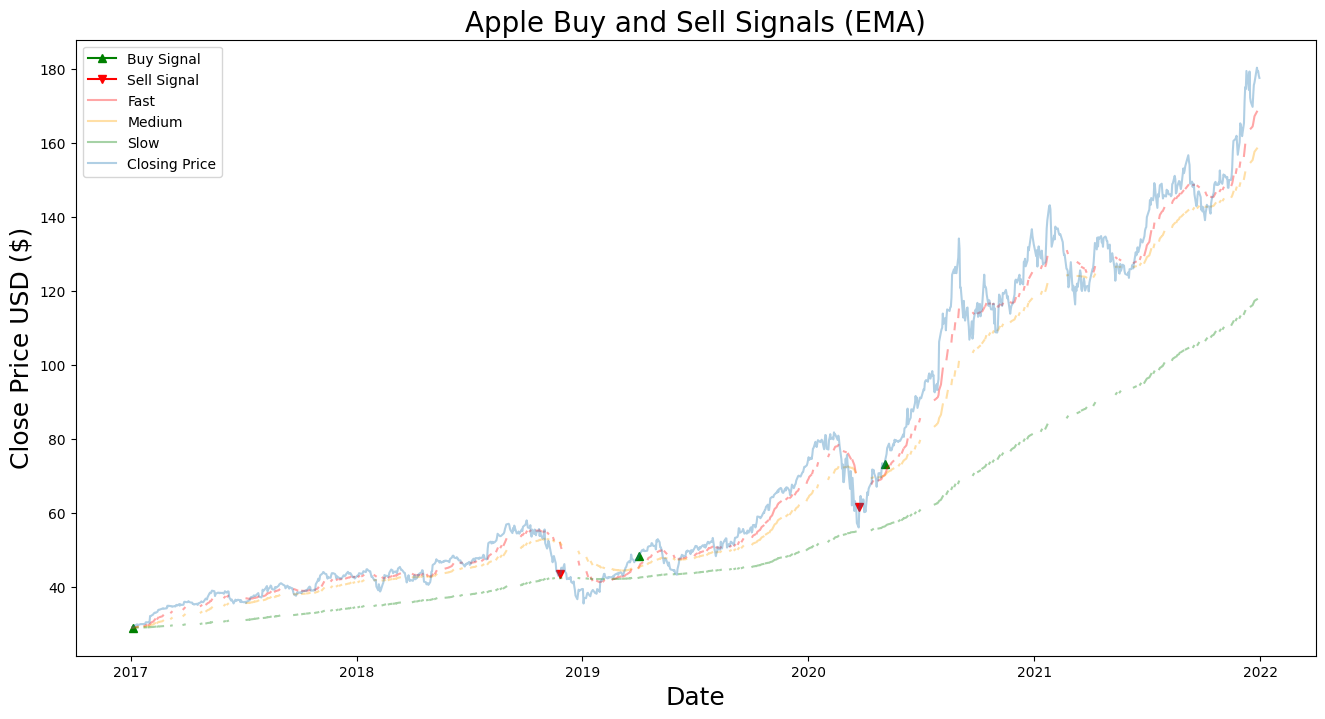

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\278998053.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (np.isnan(data['Buy' + key][i]) ^ np.isnan(data['Sell' + key][i])):
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\278998053.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif np.isnan(data['Sell' + key][i]):
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

'Apple, 1, EMA : 27236.115314483643, 50498.54868507385, 3,0.5,1'

251834.58059501648

511519.60393097403

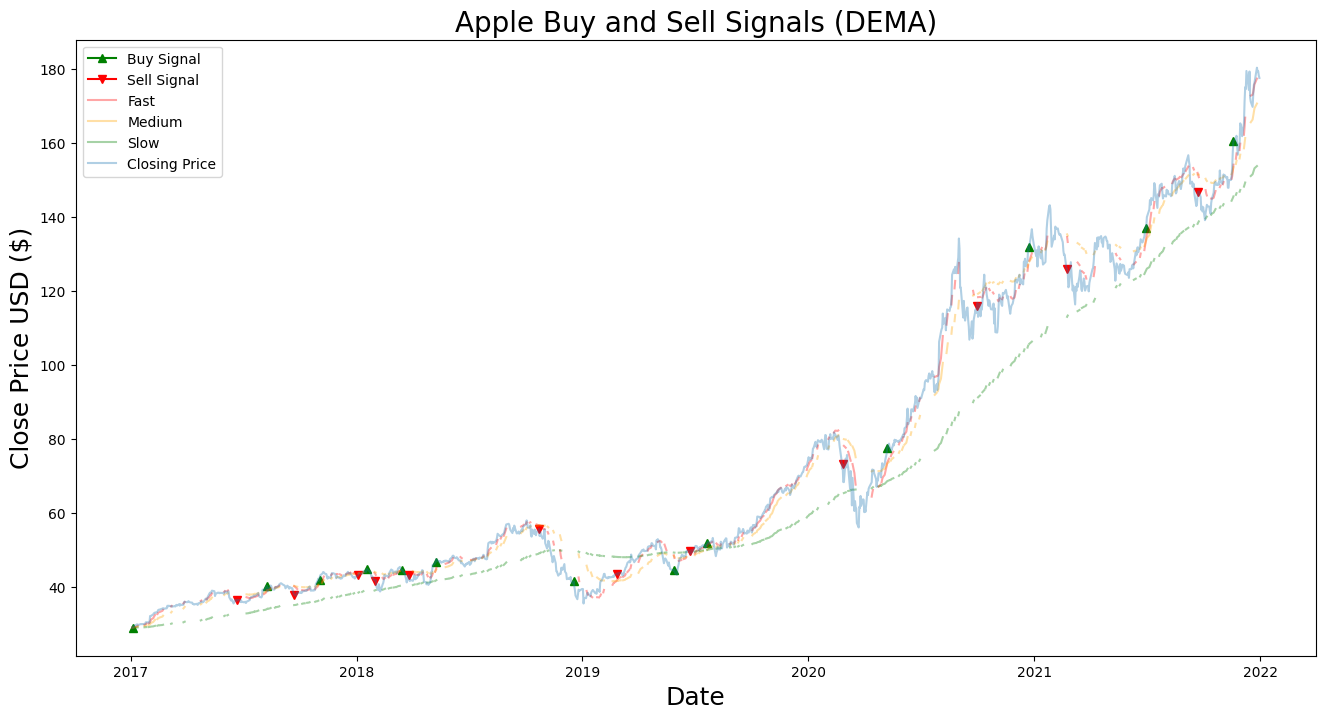

'Apple, 1, DEMA : -6771.575225830078, 49339.692779541016, 13,0.5833333333333334,5'

230885.7714252472

511519.60393097403

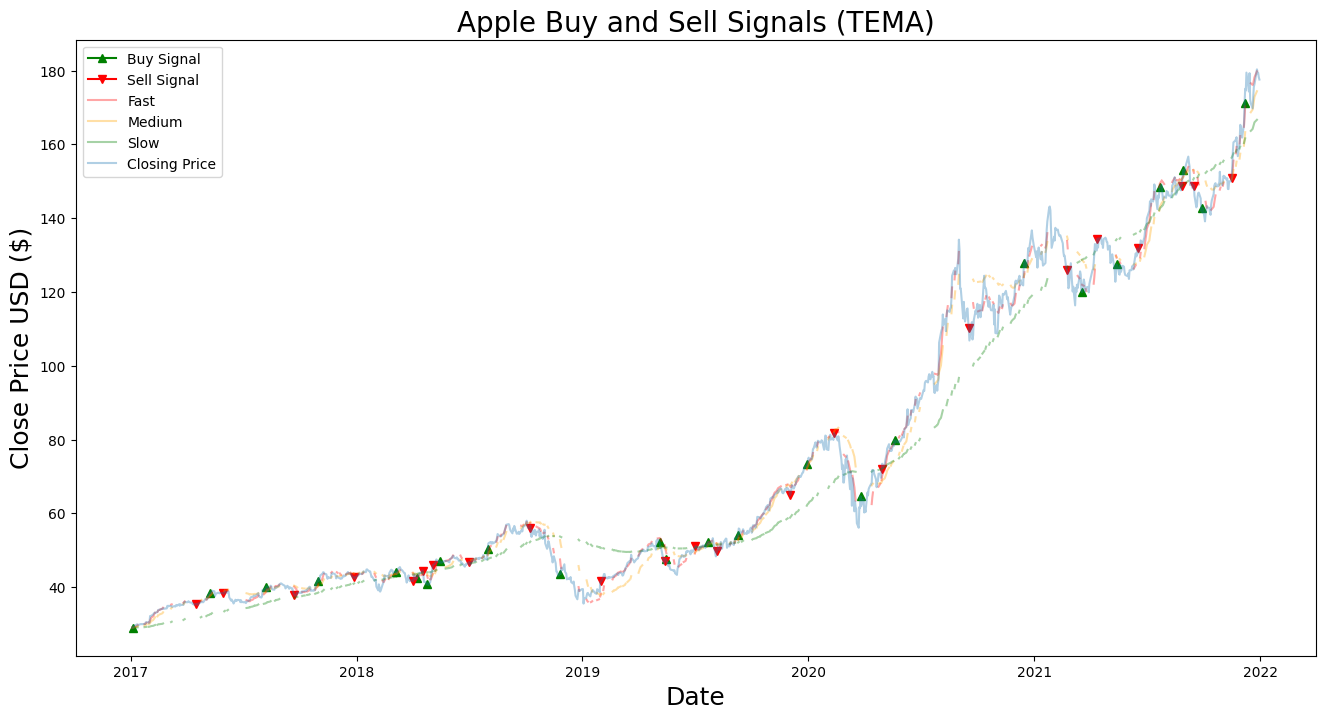

'Apple, 1, TEMA : -9503.686195373535, 38257.21446990967, 24,0.5652173913043478,10'

224884.82322502136

511519.60393097403

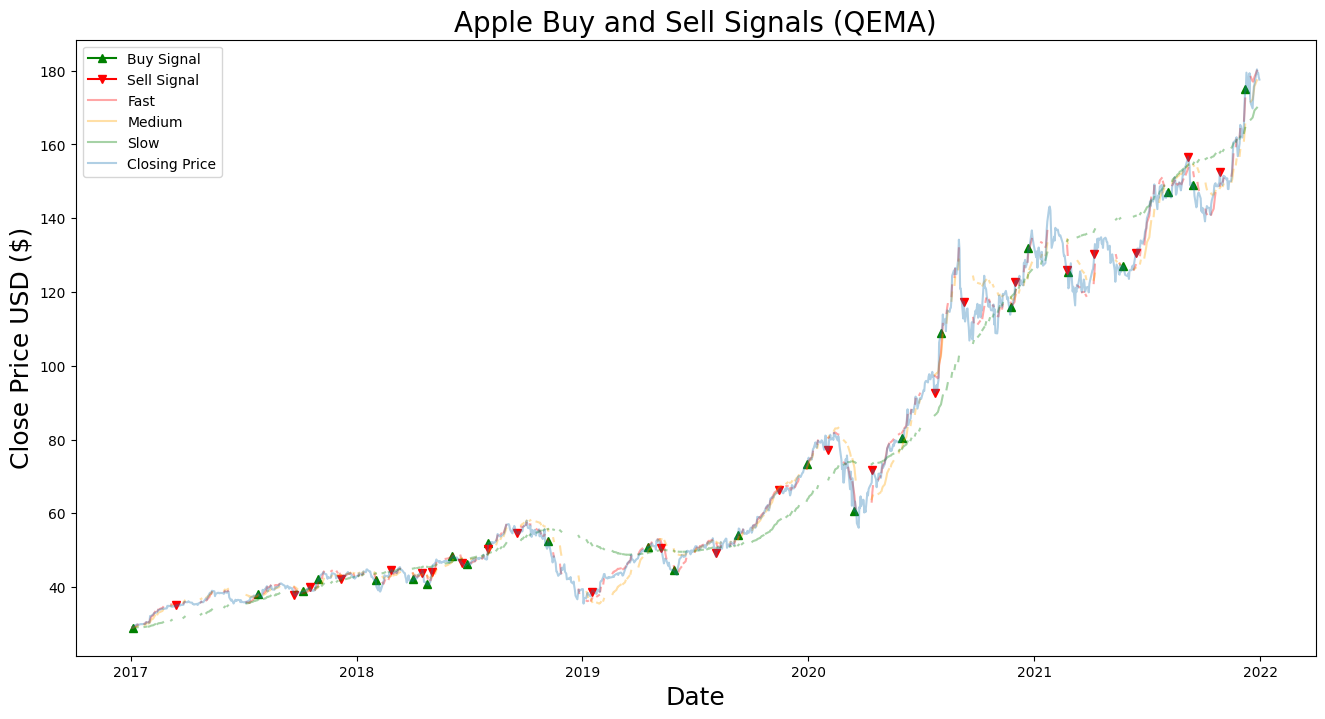

'Apple, 1, QEMA : -26198.509883880615, 22628.930912017822, 25,0.75,6'

181103.28503227234

511519.60393097403

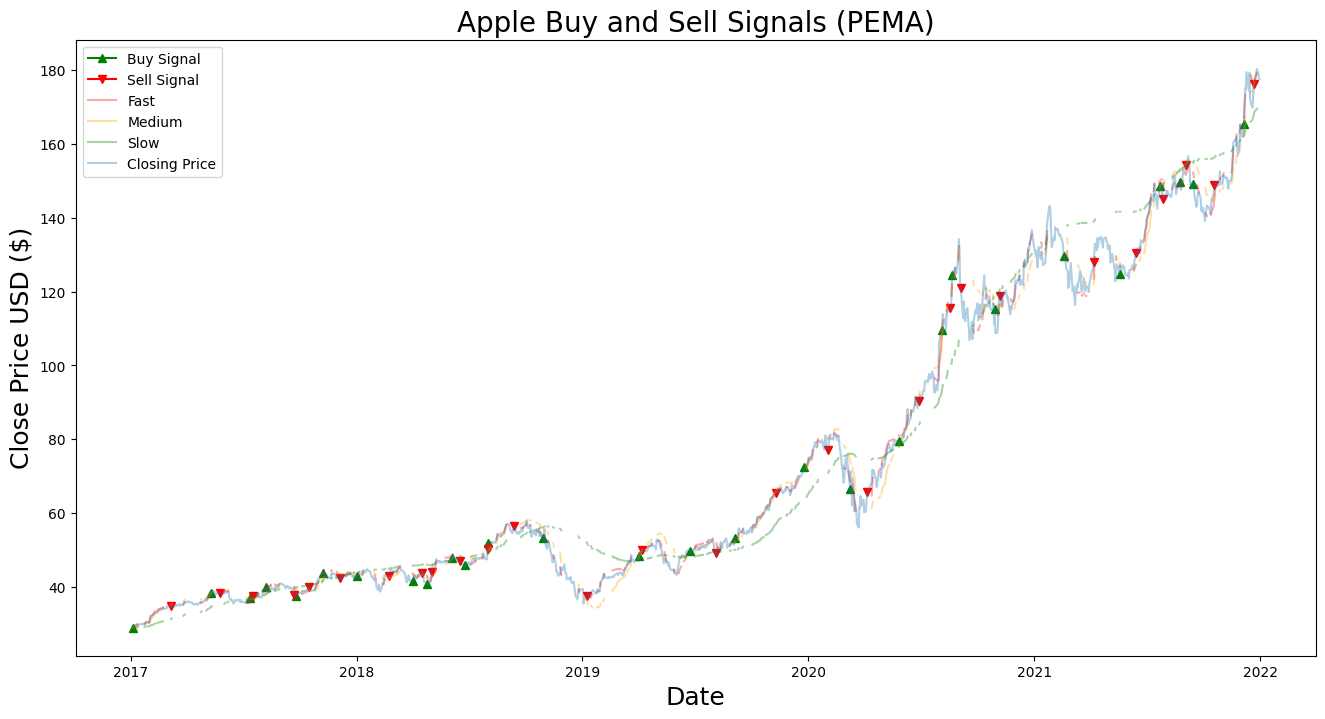

'Apple, 1, PEMA : -29320.313930511475, 22931.25629425049, 28,0.5714285714285714,12'

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03   28.950001   29.082500   28.690001   29.037500   27.059301   
2017-01-04   28.962500   29.127501   28.937500   29.004999   27.029022   
2017-01-05   28.980000   29.215000   28.952499   29.152500   27.166473   
2017-01-06   29.195000   29.540001   29.117500   29.477501   27.469330   
2017-01-09   29.487499   29.857500   29.485001   29.747499   27.720934   
...                ...         ...         ...         ...         ...   
2021-12-27  177.089996  180.419998  177.070007  180.330002  178.527771   
2021-12-28  180.160004  181.330002  178.529999  179.289993  177.498154   
2021-12-29  179.330002  180.630005  178.139999  179.380005  177.587265   
2021-12-30  179.470001  180.570007  178.089996  178.199997  176.419052   
2021-12-31  178.089996  179.229996  177.259995  177.570007  175.795319   

               Volume   Short_EMA  Middle_EMA    Long_EMA  Short_DEMA  ...  \
Date                                                                   ...   
2017-01-03  115127600   29.037500   29.037500   29.037500   29.037500  ...   
2017-01-04   84472400   29.034405   29.036226   29.037284   29.031604  ...   
2017-01-05   88774400   29.045652   29.040786   29.038050   29.053294  ...   
2017-01-06  127007600   29.086781   29.057912   29.040970   29.130906  ...   
2017-01-09  134247600   29.149706   29.084954   29.045664   29.246562  ...   
...               ...         ...         ...         ...         ...  ...   
2021-12-27   74919600  168.454841  158.500958  117.753184  177.384638  ...   
2021-12-28   79144300         NaN         NaN         NaN         NaN  ...   
2021-12-29   62348900  169.495333  159.319744  118.162665  178.516070  ...   
2021-12-30   59773000         NaN         NaN         NaN         NaN  ...   
2021-12-31   64062300         NaN         NaN         NaN         NaN  ...   

             Buy_QEMA  Sell_QEMA  Trade_Signals_QEMA  Returns_QEMA  \
Date                                                                 
2017-01-03        NaN        NaN                None      0.000000   
2017-01-04  29.004999        NaN                 Buy     -0.000000   
2017-01-05        NaN        NaN                None    508.435919   
2017-01-06        NaN        NaN                None   1120.277630   
2017-01-09        NaN        NaN                None    930.685003   
...               ...        ...                 ...           ...   
2021-12-27        NaN        NaN                None   2312.551743   
2021-12-28        NaN        NaN                None   -593.844879   
2021-12-29        NaN        NaN                None     51.396622   
2021-12-30        NaN        NaN                None   -673.784531   
2021-12-31        NaN        NaN                None   -359.724075   

            Cumulative_Returns_QEMA   Buy_PEMA  Sell_PEMA  Trade_Signals_PEMA  \
Date                                                                            
2017-01-03                 0.000000        NaN        NaN                None   
2017-01-04                 0.000000  29.004999        NaN                 Buy   
2017-01-05               508.435919        NaN        NaN                None   
2017-01-06              1628.713549        NaN        NaN                None   
2017-01-09              2559.398552        NaN        NaN                None   
...                             ...        ...        ...                 ...   
2021-12-27            126460.780088        NaN        NaN                None   
2021-12-28            125866.935209        NaN        NaN                None   
2021-12-29            125918.331831        NaN        NaN                None   
2021-12-30            125244.547300        NaN        NaN                None   
2021-12-31            124884.823225        NaN        NaN                None   

            Returns_PEMA  Cumulative_Returns_PEMA  
Date                   

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Cumulative_Returns' + key][len(data)-1]


803857.3081531525

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num=(investment/data['Close'][0])
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  amt=(num*data['Close'][len(data)-1])-investment


2335089.308905839

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\1291622770.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if flag_short is False and data['Middle' + key][i] < data['Long' + key][i] and data['Middle' + key][i] > data['Short' + key][i]:
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\1291622770.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif flag_long is False and data['Middle' + key][i] > data['Long' + key][i] and data['Middle' + key][i] < data['Short' + key][i]:
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\1291622770.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprec

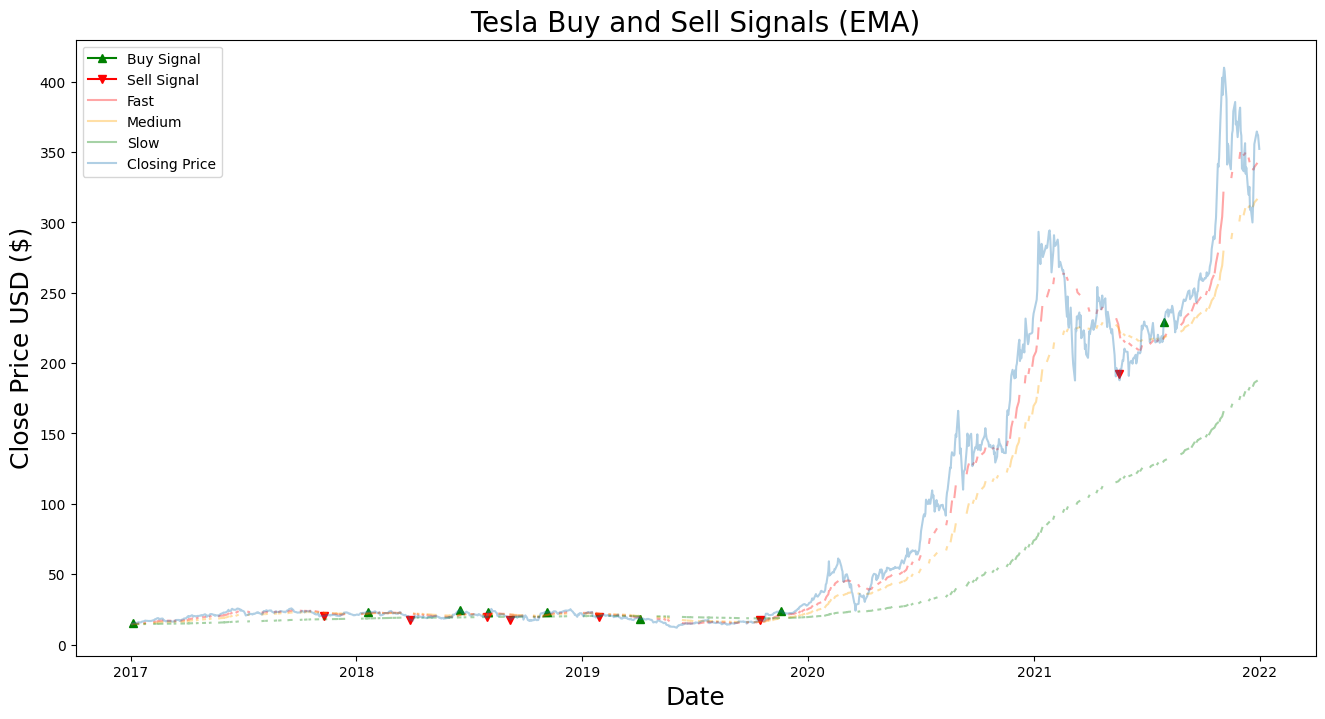

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\278998053.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (np.isnan(data['Buy' + key][i]) ^ np.isnan(data['Sell' + key][i])):
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\278998053.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif np.isnan(data['Sell' + key][i]):
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

'Tesla, 1, EMA : -24687.55638885498, 703630.0633773804, 8,0.14285714285714285,6'

388963.2139863968

2335089.308905839

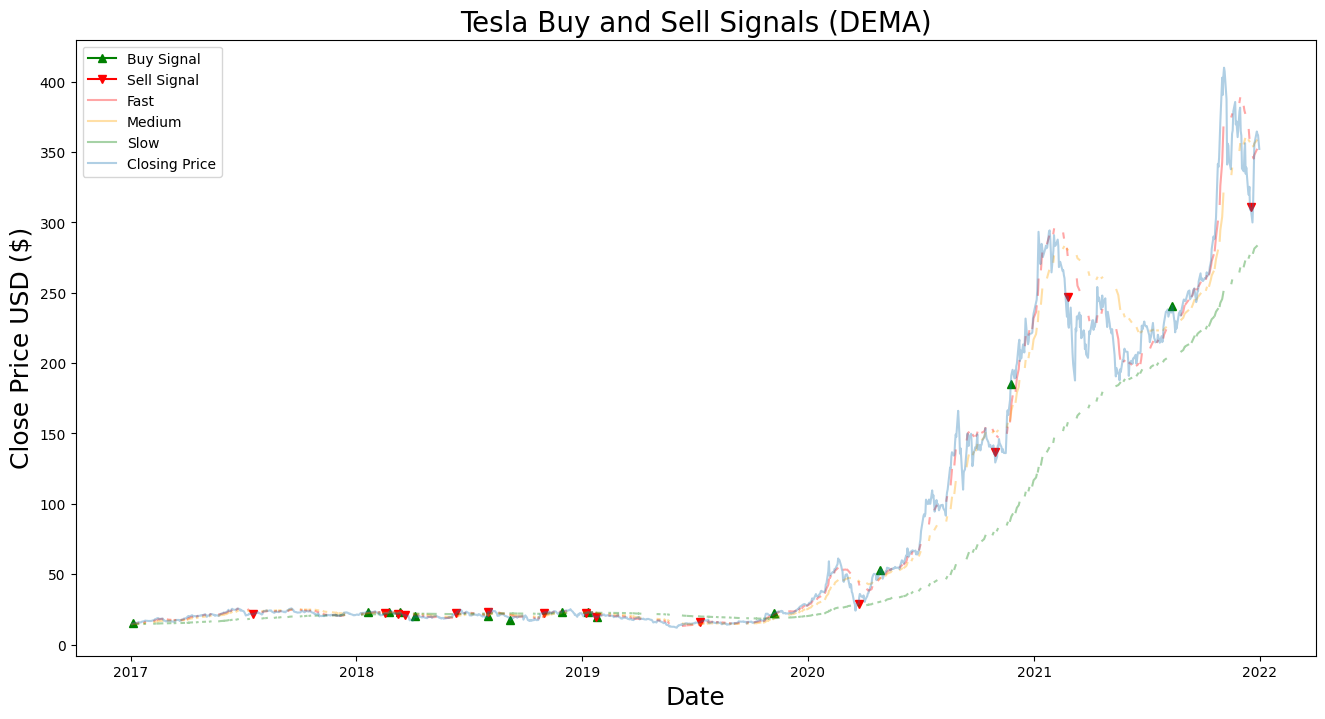

'Tesla, 1, DEMA : -19670.908352851868, 157092.37826538086, 14,0.5,7'

419391.8180847168

2335089.308905839

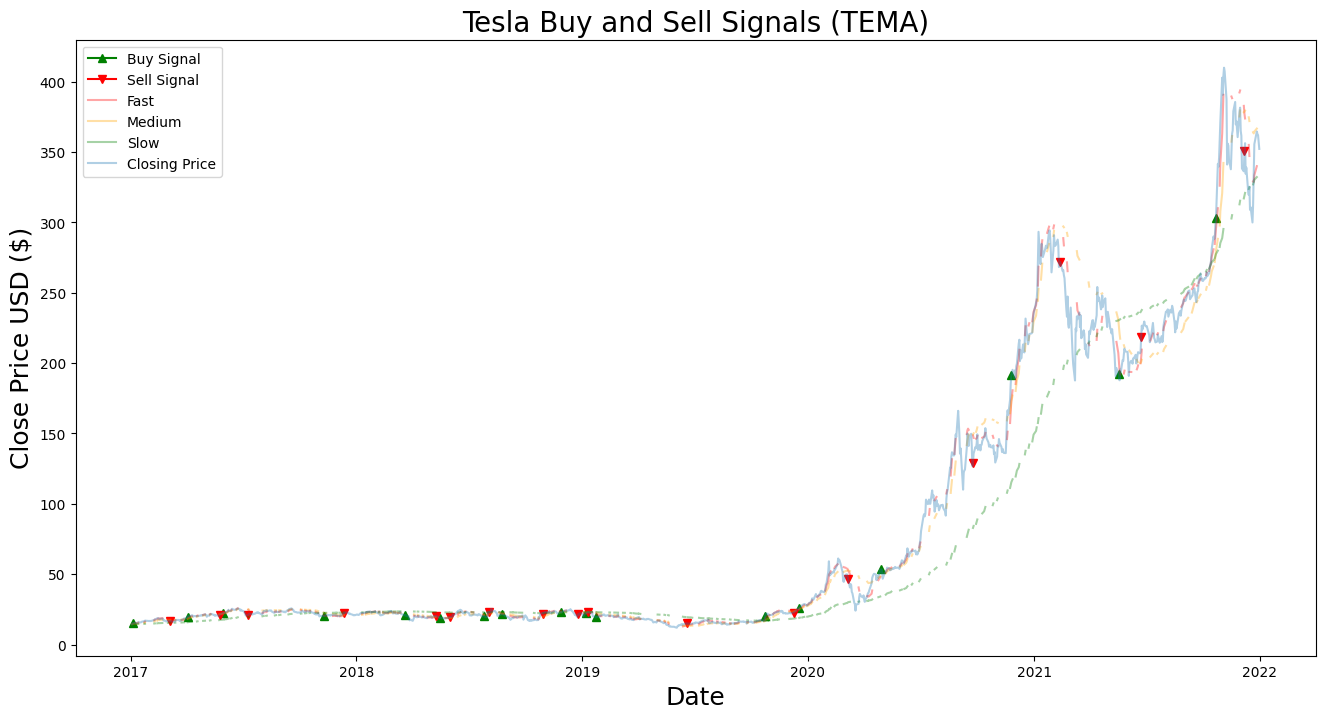

'Tesla, 1, TEMA : -22322.44128227234, 142153.2149734497, 17,0.7058823529411765,5'

487224.9841604233

2335089.308905839

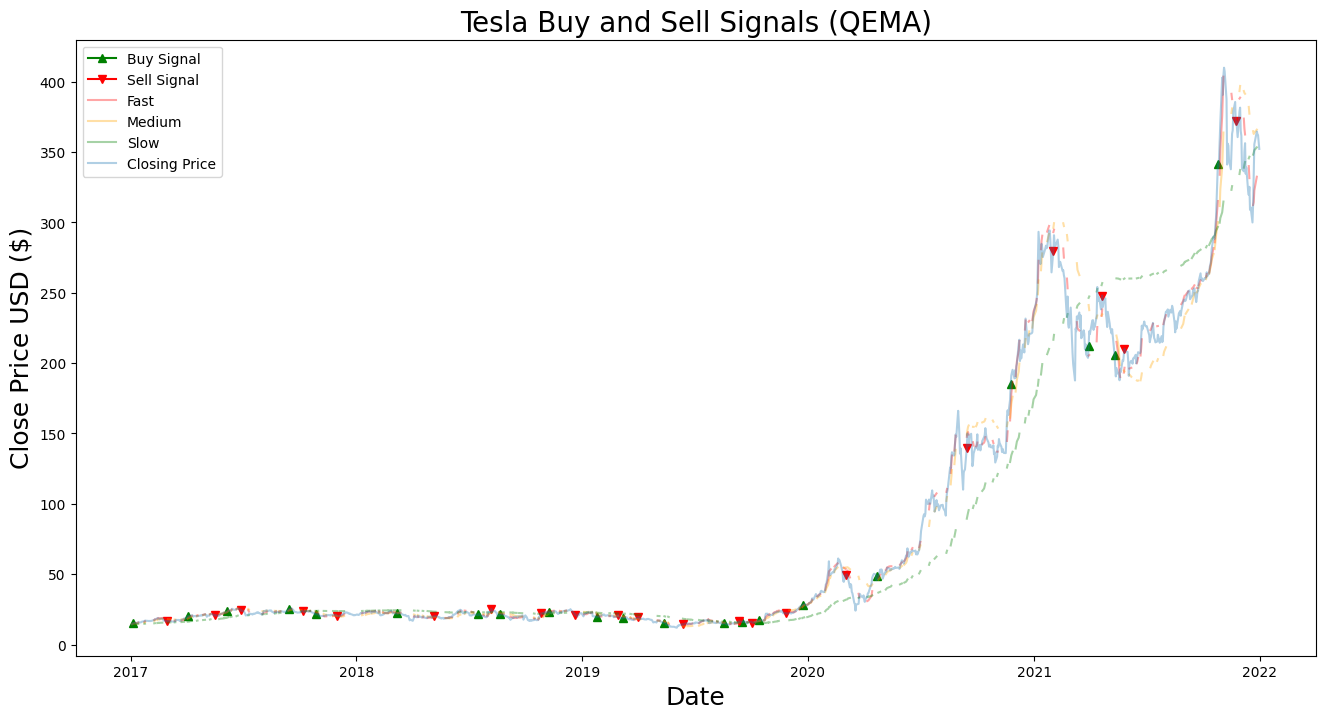

'Tesla, 1, QEMA : -8884.590003967285, 186503.171875, 21,0.6666666666666666,7'

432217.9279308319

2335089.308905839

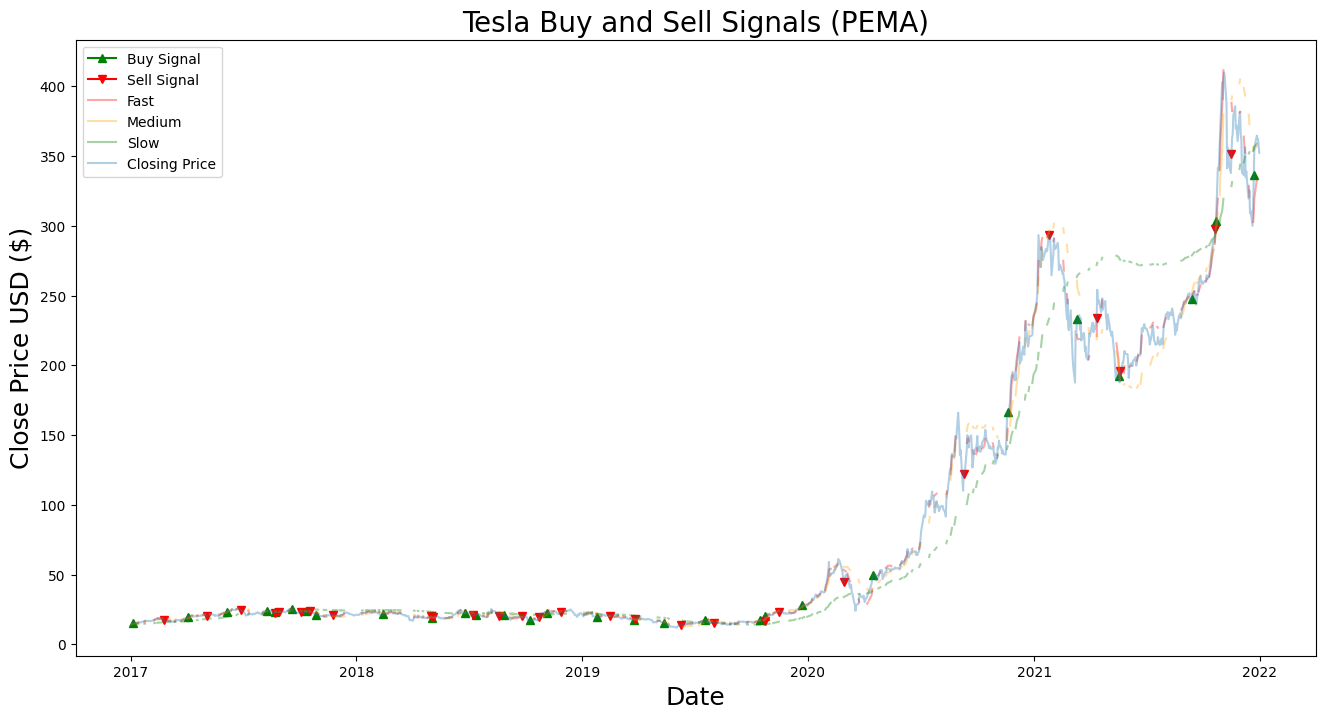

'Tesla, 1, PEMA : -9573.775283813477, 145694.27696228027, 29,0.5714285714285714,12'

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03   14.324000   14.688667   14.064000   14.466000   14.466000   
2017-01-04   14.316667   15.200000   14.287333   15.132667   15.132667   
2017-01-05   15.094667   15.165333   14.796667   15.116667   15.116667   
2017-01-06   15.128667   15.354000   15.030000   15.267333   15.267333   
2017-01-09   15.264667   15.461333   15.200000   15.418667   15.418667   
...                ...         ...         ...         ...         ...   
2021-12-27  357.890015  372.333344  356.906677  364.646667  364.646667   
2021-12-28  369.829987  373.000000  359.473328  362.823334  362.823334   
2021-12-29  366.213318  368.000000  354.713318  362.063324  362.063324   
2021-12-30  353.776672  365.183319  351.049988  356.779999  356.779999   
2021-12-31  357.813324  360.666656  351.529999  352.260010  352.260010   

               Volume   Short_EMA  Middle_EMA    Long_EMA  Short_DEMA  ...  \
Date                                                                   ...   
2017-01-03   88849500   14.466000   14.466000   14.466000   14.466000  ...   
2017-01-04  168202500   14.529492   14.492143   14.470429   14.586937  ...   
2017-01-05   88675500   14.585413   14.516635   14.474723   14.687983  ...   
2017-01-06   82918500   14.650358   14.546074   14.479990   14.801919  ...   
2017-01-09   59692500   14.723530   14.580293   14.486227   14.926860  ...   
...               ...         ...         ...         ...         ...  ...   
2021-12-27   71145900  341.748761  316.194877  187.280711  351.688164  ...   
2021-12-28   60324000         NaN         NaN         NaN         NaN  ...   
2021-12-29   56154000         NaN         NaN         NaN         NaN  ...   
2021-12-30   47040900  343.180308  317.786451  188.406952  353.468309  ...   
2021-12-31   40733700         NaN         NaN         NaN         NaN  ...   

             Buy_QEMA  Sell_QEMA  Trade_Signals_QEMA  Returns_QEMA  \
Date                                                                 
2017-01-03        NaN        NaN                None      0.000000   
2017-01-04  15.132667        NaN                 Buy      0.000000   
2017-01-05        NaN        NaN                None   -105.726639   
2017-01-06        NaN        NaN                None    995.602493   
2017-01-09        NaN        NaN                None   1000.013809   
...               ...        ...                 ...           ...   
2021-12-27        NaN        NaN                None      0.000000   
2021-12-28        NaN        NaN                None     -0.000000   
2021-12-29        NaN        NaN                None     -0.000000   
2021-12-30        NaN        NaN                None     -0.000000   
2021-12-31        NaN        NaN                None     -0.000000   

            Cumulative_Returns_QEMA   Buy_PEMA  Sell_PEMA  Trade_Signals_PEMA  \
Date                                                                            
2017-01-03                 0.000000        NaN        NaN                None   
2017-01-04                 0.000000  15.132667        NaN                 Buy   
2017-01-05              -105.726639        NaN        NaN                None   
2017-01-06               889.875854        NaN        NaN                None   
2017-01-09              1889.889664        NaN        NaN                None   
...                             ...        ...        ...                 ...   
2021-12-27            387224.984160        NaN        NaN                None   
2021-12-28            387224.984160        NaN        NaN                None   
2021-12-29            387224.984160        NaN        NaN                None   
2021-12-30            387224.984160        NaN        NaN                None   
2021-12-31            387224.984160        NaN        NaN                None   

            Returns_PEMA  Cumulative_Returns_PEMA  
Date                   

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Cumulative_Returns' + key][len(data)-1]


940489.5291099548

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num=(investment/data['Close'][0])
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  amt=(num*data['Close'][len(data)-1])-investment


2979475.94372655

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\1291622770.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if flag_short is False and data['Middle' + key][i] < data['Long' + key][i] and data['Middle' + key][i] > data['Short' + key][i]:
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\1291622770.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif flag_long is False and data['Middle' + key][i] > data['Long' + key][i] and data['Middle' + key][i] < data['Short' + key][i]:
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\1291622770.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprec

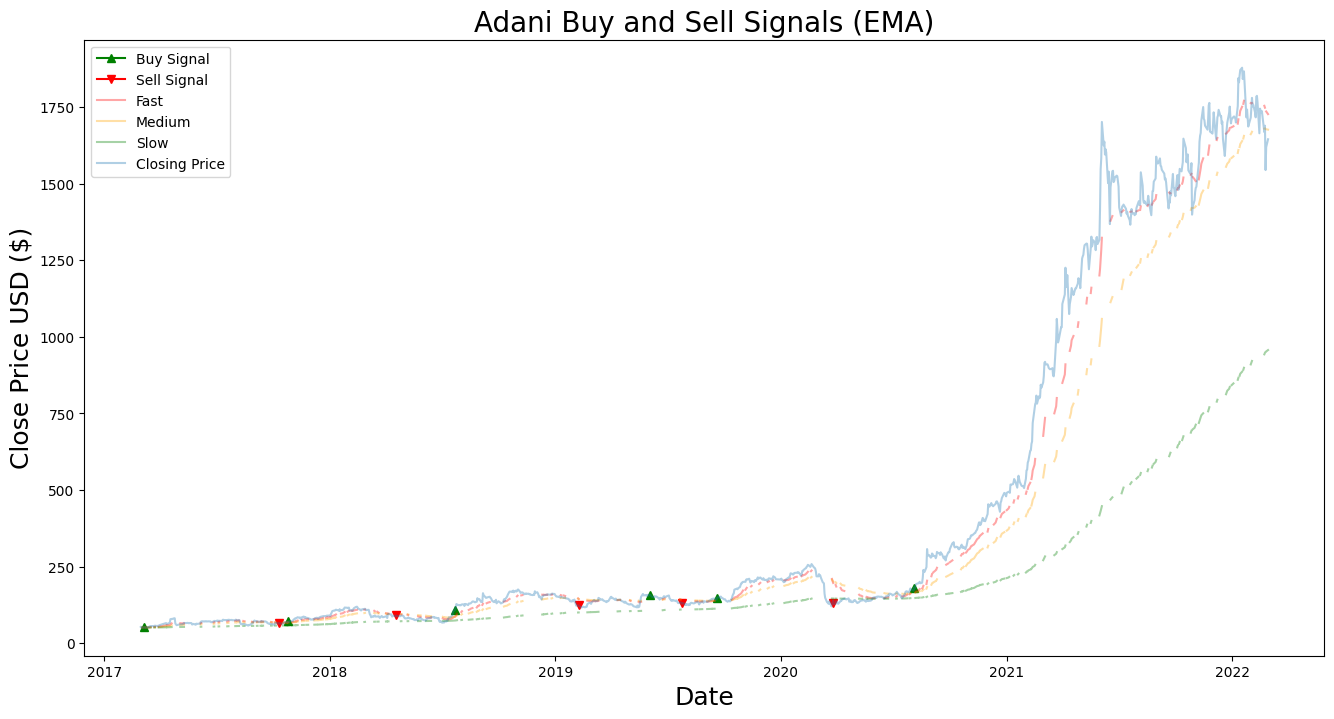

C:\Users\atris\AppData\Local\Temp\ipykernel_11948\278998053.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (np.isnan(data['Buy' + key][i]) ^ np.isnan(data['Sell' + key][i])):
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\278998053.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif np.isnan(data['Sell' + key][i]):
C:\Users\atris\AppData\Local\Temp\ipykernel_11948\854559198.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

'Adani, 1, EMA : -17081.598083496094, 27305.020141601562, 6,0.4,3'

520862.90182876587

2979475.94372655

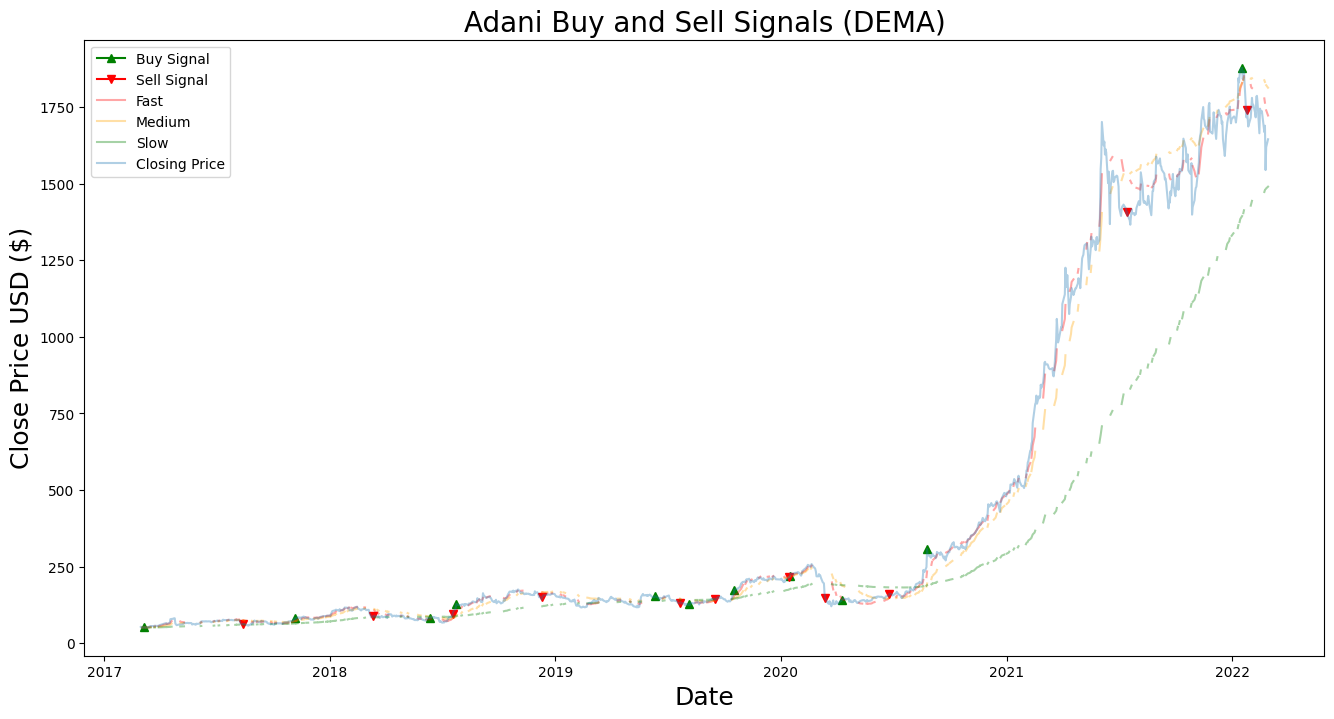

'Adani, 1, DEMA : -32347.5, 357629.98809814453, 11,0.6363636363636364,4'

422015.0761833191

2979475.94372655

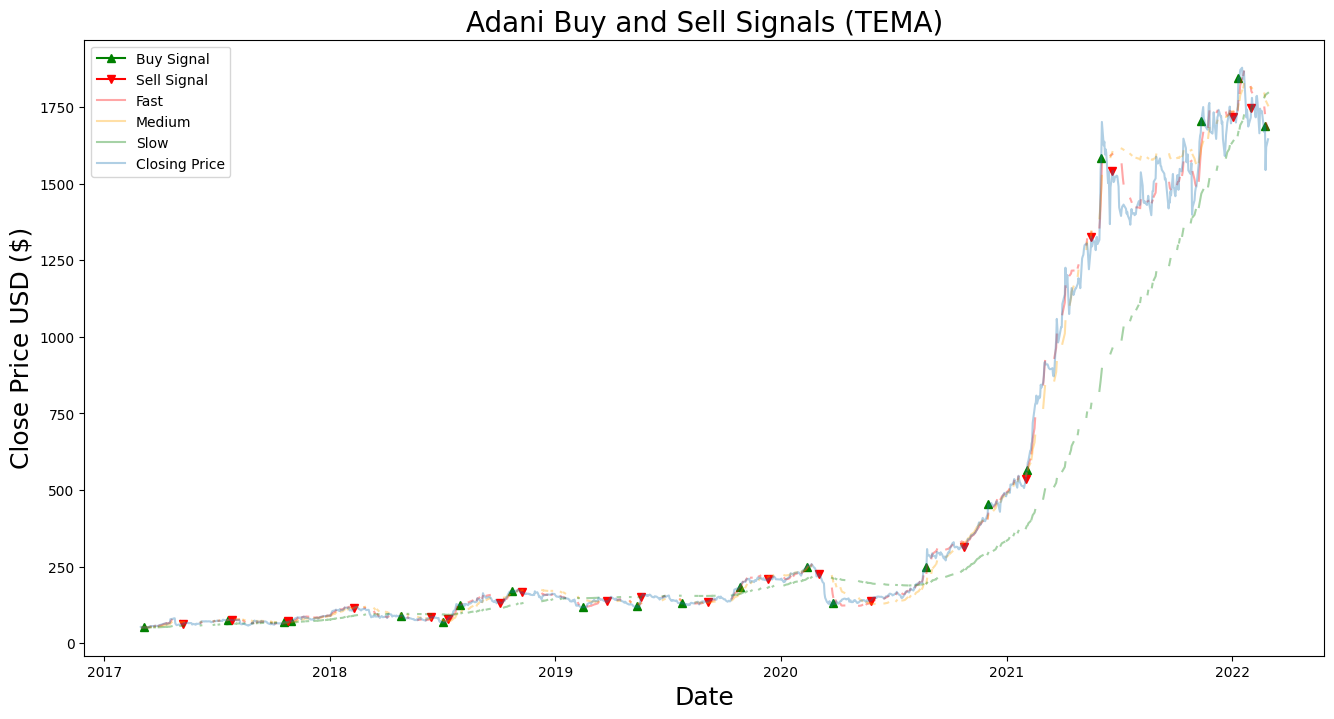

'Adani, 1, TEMA : -9579.998779296875, 134962.48919677734, 21,0.7,6'

302182.0638694763

2979475.94372655

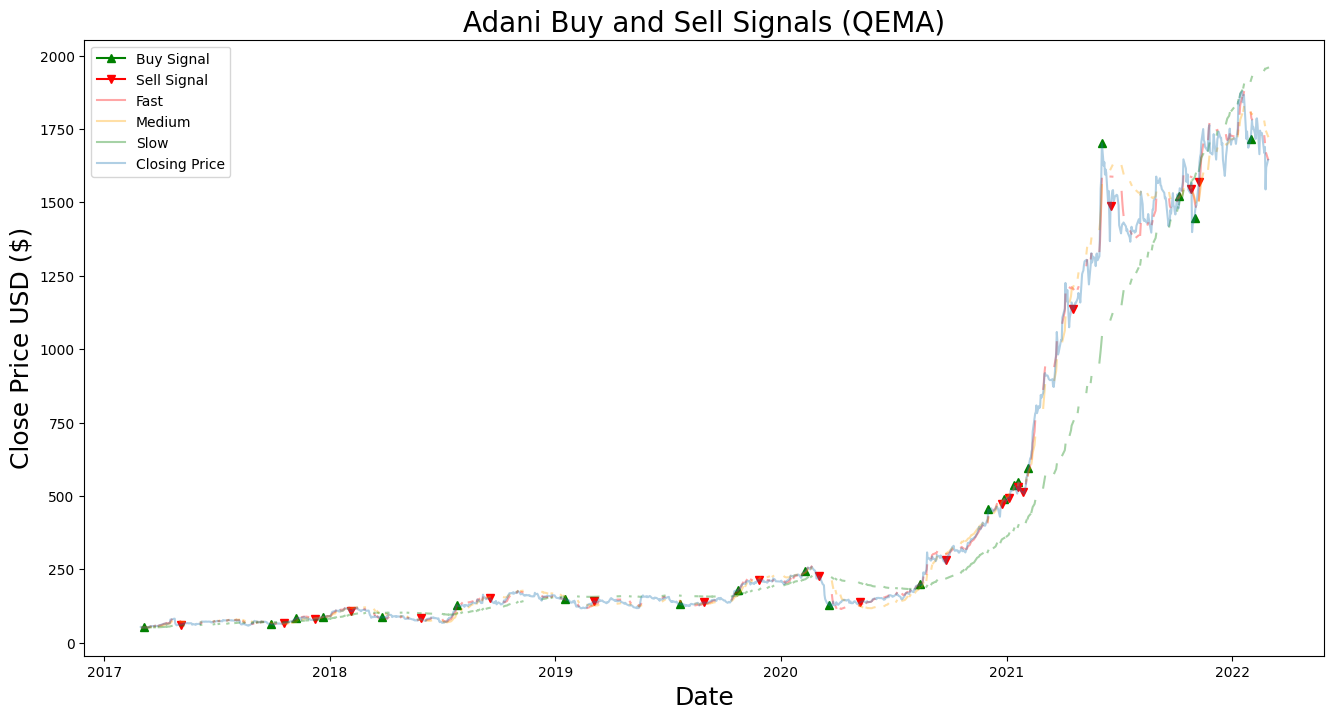

'Adani, 1, QEMA : -12380.09716796875, 90347.0, 21,0.6,8'

354397.5995025635

2979475.94372655

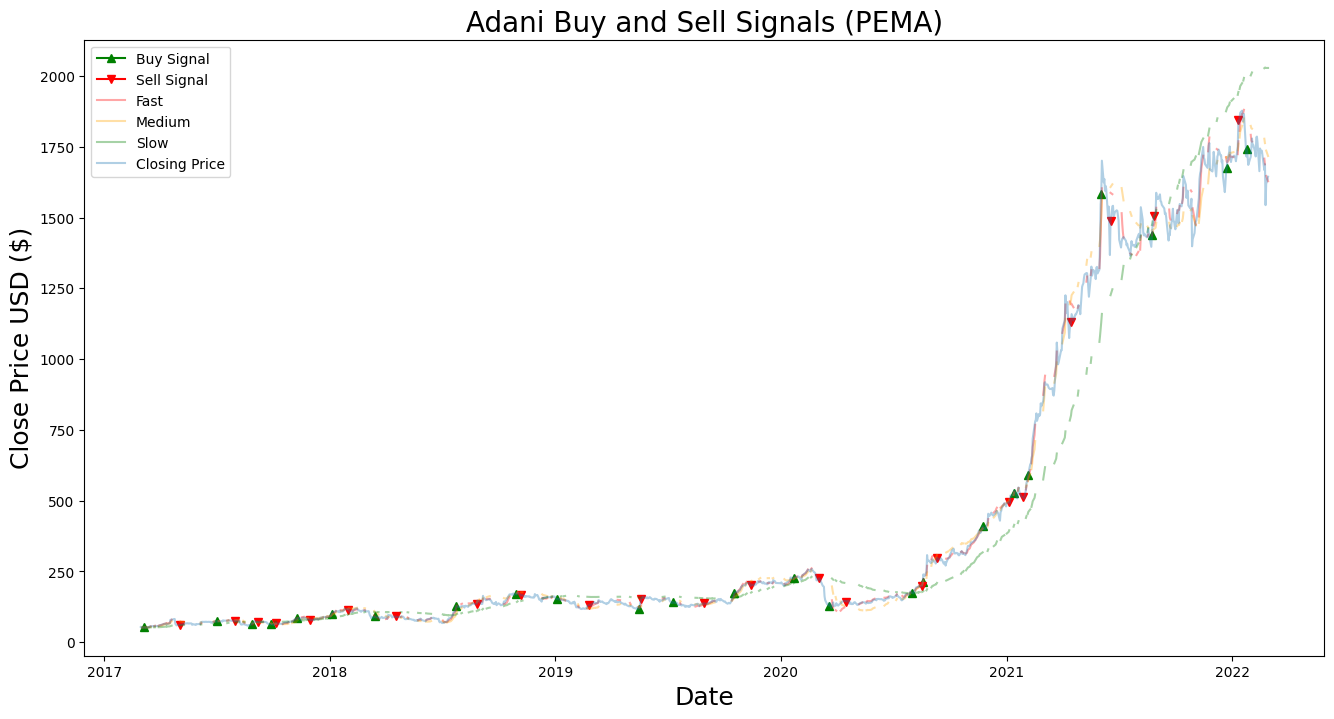

'Adani, 1, PEMA : -13460.251998901367, 91302.2396850586, 24,0.6086956521739131,9'

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-03-01    53.945221    54.244919    52.937153    53.400318    52.323074   
2017-03-02    53.591034    54.435631    50.703060    51.002754    49.973877   
2017-03-03    50.784794    51.929089    50.648567    51.602146    50.561180   
2017-03-06    51.792862    52.228783    51.247959    51.983578    50.934914   
2017-03-07    52.119801    54.163181    51.874596    53.318584    52.242989   
...                 ...          ...          ...          ...          ...   
2022-02-22  1636.099976  1678.900024  1630.000000  1667.699951  1666.158936   
2022-02-23  1682.000000  1717.500000  1670.000000  1688.699951  1687.139526   
2022-02-24  1626.000000  1648.599976  1528.800049  1543.949951  1542.523193   
2022-02-25  1594.000000  1638.099976  1578.800049  1618.699951  1617.204102   
2022-02-28  1603.750000  1651.099976  1592.250000  1644.449951  1642.930420   

             Volume    Short_EMA   Middle_EMA    Long_EMA   Short_DEMA  ...  \
Date                                                                    ...   
2017-03-01  4400485          NaN          NaN         NaN          NaN  ...   
2017-03-02  7200998          NaN          NaN         NaN          NaN  ...   
2017-03-03  7195693    51.602146    51.602146   51.602146    51.602146  ...   
2017-03-06  4110992    51.638473    51.617104   51.604681    51.671340  ...   
2017-03-07  9477886    51.798484    51.683829   51.616069    51.972992  ...   
...             ...          ...          ...         ...          ...  ...   
2022-02-22  1717579  1753.578566  1679.106776  942.778169  1777.746109  ...   
2022-02-23  1285012  1747.399650  1679.482979  947.734460  1763.675075  ...   
2022-02-24  2798065          NaN          NaN         NaN          NaN  ...   
2022-02-25  1741584  1735.142536  1677.099331  952.192703  1738.778151  ...   
2022-02-28  1869037  1726.505147  1675.818963  956.792419  1721.979732  ...   

             Buy_QEMA  Sell_QEMA  Trade_Signals_QEMA  Returns_QEMA  \
Date                                                                 
2017-03-01        NaN        NaN                None      0.000000   
2017-03-02        NaN        NaN                None     -0.000000   
2017-03-03        NaN        NaN                None      0.000000   
2017-03-06  51.983578        NaN                 Buy      0.000000   
2017-03-07        NaN        NaN                None   2567.217911   
...               ...        ...                 ...           ...   
2022-02-22        NaN        NaN                None  -1015.000000   
2022-02-23        NaN        NaN                None   1218.000000   
2022-02-24        NaN        NaN                None  -8395.500000   
2022-02-25        NaN        NaN                None   4335.500000   
2022-02-28        NaN        NaN                None   1493.500000   

            Cumulative_Returns_QEMA   Buy_PEMA  Sell_PEMA  Trade_Signals_PEMA  \
Date                                                                            
2017-03-01                 0.000000        NaN        NaN                None   
2017-03-02                 0.000000        NaN        NaN                None   
2017-03-03                 0.000000        NaN        NaN                None   
2017-03-06                 0.000000  51.983578        NaN                 Buy   
2017-03-07              2567.217911        NaN        NaN                None   
...                             ...        ...        ...                 ...   
2022-02-22            203530.563869        NaN        NaN                None   
2022-02-23            204748.563869        NaN        NaN                None   
2022-02-24            196353.063869        NaN        NaN                None   
2022-02-25            200688.563869        NaN        NaN                None   
2022-02-28            202182.063869        NaN        NaN                None   

Stock     EMA_return    DEMA_return    TEMA_return    QEMA_return  \
0     Google, 1  120684.424309  115863.353088   47154.681900   32461.399380   
1  Microsoft, 1  267181.349216   80533.116604   75936.839771   70338.304310   
2      Apple, 1  219972.592741  151834.580595  130885.771425  124884.823225   
3      Tesla, 1  703857.308153  288963.213986  319391.818085  387224.984160   
4      Adani, 1  840489.529110  420862.901829  322015.076183  202182.063869   

     PEMA_return    Max_returns  
0   65030.156651  120684.424309  
1   96577.890896  267181.349216  
2   81103.285032  219972.592741  
3  332217.927931  703857.308153  
4  254397.599503  840489.529110

Stock     EMA_ROI    DEMA_ROI    TEMA_ROI    QEMA_ROI    PEMA_ROI  \
0     Google, 1  120.684424  115.863353   47.154682   32.461399   65.030157   
1  Microsoft, 1  267.181349   80.533117   75.936840   70.338304   96.577891   
2      Apple, 1  219.972593  151.834581  130.885771  124.884823   81.103285   
3      Tesla, 1  703.857308  288.963214  319.391818  387.224984  332.217928   
4      Adani, 1  840.489529  420.862902  322.015076  202.182064  254.397600   

      Max_ROI  
0  120.684424  
1  267.181349  
2  219.972593  
3  703.857308  
4  840.489529

Stock   EMA_AROI  DEMA_AROI  TEMA_AROI  QEMA_AROI  PEMA_AROI  \
0     Google, 1  17.153249  16.636850   8.032597   5.783484  10.538270   
1  Microsoft, 1  29.710795  12.541157  11.962183  11.240380  14.474020   
2      Apple, 1  26.189307  20.288213  18.216864  17.595859  12.612154   
3      Tesla, 1  51.717540  31.214463  33.206062  37.260605  34.011033   
4      Adani, 1  56.556388  39.105623  33.372285  24.753787  28.794748   

    Max_AROI  
0  17.153249  
1  29.710795  
2  26.189307  
3  51.717540  
4  56.556388

Stock  EMA_sharpe  DEMA_sharpe  TEMA_sharpe  QEMA_sharpe  \
0     Google, 1    0.813186     1.083207     0.469195     0.338996   
1  Microsoft, 1    1.177542     0.771890     0.827409     0.762209   
2      Apple, 1    1.022471     1.229703     1.136073     1.163625   
3      Tesla, 1    0.586062     0.698661     0.903949     1.102067   
4      Adani, 1    0.983417     1.098307     1.383632     0.934309   

   PEMA_sharpe  Max_sharpe  
0     0.722785    1.083207  
1     1.121519    1.177542  
2     0.754860    1.229703  
3     0.987030    1.102067  
4     1.205434    1.383632

Stock  EMA_drawdown  DEMA_drawdown  TEMA_drawdown  QEMA_drawdown  \
0     Google, 1      0.369258       0.302846       0.342658       0.471419   
1  Microsoft, 1      0.165305       0.287339       0.290118       0.339659   
2      Apple, 1      0.320568       0.367110       0.359162       0.300745   
3      Tesla, 1      0.286563       0.226023       0.215134       0.135180   
4      Adani, 1      0.239463       0.325261       0.297839       0.374158   

   PEMA_drawdown  Max_drawdown  
0       0.296421      0.471419  
1       0.176696      0.339659  
2       0.275891      0.367110  
3       0.226101      0.286563  
4       0.297597      0.374158

In [23]:
investment = 100000
ratio = 1
returns_df = pd.DataFrame(columns = ['Stock', 'EMA_return', 'DEMA_return', 'TEMA_return', 'QEMA_return', 'PEMA_return','Max_returns'])
aroi_df = pd.DataFrame(columns = ['Stock', 'EMA_AROI', 'DEMA_AROI', 'TEMA_AROI', 'QEMA_AROI', 'PEMA_AROI','Max_AROI'])
sharpe_df = pd.DataFrame(columns = ['Stock', 'EMA_sharpe', 'DEMA_sharpe', 'TEMA_sharpe', 'QEMA_sharpe', 'PEMA_sharpe','Max_sharpe'])
drawdown_df = pd.DataFrame(columns = ['Stock', 'EMA_drawdown',  'DEMA_drawdown',  'TEMA_drawdown',  'QEMA_drawdown',  'PEMA_drawdown','Max_drawdown'])
roi_df = pd.DataFrame(columns = ['Stock', 'EMA_ROI', 'DEMA_ROI', 'TEMA_ROI', 'QEMA_ROI', 'PEMA_ROI','Max_ROI'])
for i in [(GOOGL, 'Google'), (MSFT, 'Microsoft'), (AAPL, 'Apple'), (TSLA, 'Tesla'), (ADANI,'Adani')]:
    r_list = [i[1] + ', ' + str(ratio)]
    aroi_list = [i[1] + ', ' + str(ratio)]
    sharpe_list = [i[1] + ', ' + str(ratio)]
    dd_df = [i[1] + ', ' + str(ratio)]
    roi_list = [i[1] + ', ' + str(ratio)]
    
    for k in ['_EMA', '_DEMA', '_TEMA', '_QEMA', '_PEMA'] :
        display(benchmark_returns(i[0],k))
        buy_sell_flags(i[0], k)
        display_buy_sell_flags(i[0], i[1], k)
        trade_signals(i[0], k)
        returns(i[0], k, investment, ratio)
        r_list.append(net_return(i[0], k))
        aroi_list.append(annual_ROI (i[0], k, investment))
        roi_list.append(ROI (i[0], k, investment))
        sharpe_list.append(sharpe_ratio(i[0], k, investment))
        dd_df.append(drawdown_ratio(i[0], k))
        display(i[1] + ', ' + str(ratio) + ', ' + k[1:] + ' : ' + str(min_max_number_trades(i[0], k, ratio)[0]) + ', ' + str(min_max_number_trades(i[0], k, ratio)[1]) + ', ' + str(min_max_number_trades(i[0], k, ratio)[2])+','+str(min_max_number_trades(i[0], k, ratio)[3])+','+str(min_max_number_trades(i[0], k, ratio)[4]))
        
    display(i[0])
    
    max_value_r = max(r_list[1:])
    max_value_aroi = max(aroi_list[1:])
    max_value_roi = max(roi_list[1:])
    max_value_sharpe = max(sharpe_list[1:])
    max_value_dd_df = max(dd_df[1:])
    
    r_list.append(max_value_r)
    aroi_list.append(max_value_aroi)
    roi_list.append(max_value_roi)
    sharpe_list.append(max_value_sharpe)
    dd_df.append(max_value_dd_df)
    
    returns_df.loc[len(returns_df)] = r_list
    aroi_df.loc[len(roi_df)] = aroi_list
    roi_df.loc[len(roi_df)] = roi_list
    sharpe_df.loc[len(sharpe_df)] = sharpe_list
    drawdown_df.loc[len(drawdown_df)] = dd_df
display(returns_df)
display(roi_df)
display(aroi_df)
display(sharpe_df)
display(drawdown_df)

In [17]:
summary = pd.concat([returns_df, roi_df.drop('Stock', axis = 1), aroi_df.drop('Stock', axis = 1), sharpe_df.drop('Stock', axis = 1), drawdown_df.drop('Stock', axis = 1)],axis = 1)
summary.to_csv('/Users/atris/Desktop/Demo/Summary1.csv', index = False)